
# Анализ поведения пользователей в мобильном приложении "Ненужные вещи"

В нашем распоряжении данные о событиях, совершенных в приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений. Заказчик исследования - продуктовый менеджер, который хочет **улучшить вовлечённость пользователей и увеличить конверсию в целевое событие - просмотр контактов.**

Цели нашего исследования:

1) Управление вовлеченностью клиентов (адаптация приложения по целевой и смежной аудитории) на основе данных о поведении пользователей.

2) Получить на основе поведения пользователей гипотезы о том, как можно было бы улучшить приложение с точки зрения пользовательского опыта.

**Описание данных:**

Таблица #1 содержит колонки:

- идентификатор пользователя,
- источник, с которого пользователь установил приложение.

Таблица #2 содержит колонки:

- время совершения,
- идентификатор пользователя,
- действие пользователя.

Виды действий:

- открыл карточки объявления,
- просмотрел фотографий в объявлении,
- увидел рекомендованные объявления,
- кликнул по рекомендованному объявлению,
- посмотрел номер телефона,
- позвонил по номеру из объявления,
- открыл карту объявлений,
- разные действия, связанные с поиском по сайту,
- добавил объявление в избранное.

**Наше исследование будет состоять из следующих этапов:**

**1. Загрузка и обзор данных;**
- Импортируем библиотеки;
- Загрузим данные из файлов и просмотрим 10 строк данных с помощью методов .head() и .tail().;
- Посмотрим статистическое описание данных с помощью describe();
- Изучим общую информацию о датасете методом .info() для получения общей информации о данных (размер датасета, типы данных и т.д.).

**2. Предобработка данных;**
- Переименуем колонки для лучшей читабельности и удобства нашего анализа;
- Проверим, что типы данных соответствуют ожидаемым, и преобразуем их при необходимости;
- Для удобства анализа объединим два датасета в один общий;
- Узнаем есть ли дубликаты (явные и неявные) и при необходимости удалим их;
- Отобразим информацию о пропущенных значениях и определим, какие столбцы нуждаются в обработке;
- Проверим, что все наименования колонок соответствуют стилю (например, без пробелов, с использованием нижнего регистра);
- Объединим близкие по смыслу и содержанию столбцы в один общий.

**3. Проведем исследовательский анализ данных;**
- Узнаем сколько всего событий и пользователей в датасете;
- Изучим распределение событий по времени (узнаем какой период охватывают данные);
- Посмотрим распределение событий по пользователям;
- Проанализируем распределение пользователей по источникам;
- Посмотрим на распределение событий (наиболее частые события и наименее);
- Проанализируем какие события чаще совершают целевые пользователи;
- Изучим распределение целевых пользователей по всем типам событий;
- Посчитаем метрику DAU и метрику WAU (кол-во пользователей в неделю);
- Визуализируем распределения для наглядности представления данных;

**4. Проанализируем влияние событий на совершение целевого события - просмотра контактов**
- Изучим пользовательские сессий. Определим тайм-аут между событиями. Выясним длительность сессий;
- Посмотрим какое количество сессий приходится на одного пользователя;
- В разрезе сессий отберем поведенческие сценарии\паттерны, которые приводят к целевому действию (просмотру контактов);
- Построим воронки сценариев, которые приводят к целевому действию. Проанализируем поведение пользователей и узнаем сколько пользователей доходят от предыдущего шага до следующего;
- Оценим, какие действия чаще совершают те пользователи, которые просматривают контакты (рассчитаем относительную частоту событий в разрезе двух групп пользователей).

**5. Проверим статистические гипотезы;**
- Проверим гипотезу различия конверсии в просмотры контактов между двумя группами пользователями: которые совершили событие tips_show и событие tips_click, и теми пользователями, которые совершили только событие tips_show.
- Проверим гипотезу, что конверсия в целевое событие между группами, пришедших из разных источников - различается.

**6. Итоговые выводы и рекомендации;**

**7. Презентация.**

Следование этим этапам и подзадачам поможет структурировать процесс анализа данных, не упустить важных моментов и обеспечит его полноту.

##  Загрузка и обзор данных;

### Импортируем библиотеки

In [1]:
# импортируем библиотеки для работы
import pandas as pd
pd.set_option('display.max_columns', 25) # задаем максимальное кол-во столбцов, которые будут отображаться
import numpy as np
from matplotlib import pyplot as plt   # импортируем библиотеки для визуализации
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from datetime import datetime as dt, timedelta # для работы с датами и временем
from scipy import stats as st # импортируем статистические функции и методы
import math as mth # импортируем математические функции

# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

### Загрузим данные и просмотрим 10 строк с помощью методов .head() и .tail().
Посмотрим также статистическое описание данных с помощью describe();

In [2]:
# загрузим данные в переменные final_df и final_sources
try:
    final_df = pd.read_csv('/datasets/mobile_dataset.csv', sep=',')
    final_sources = pd.read_csv('/datasets/mobile_sources.csv', sep=',')
except:
    final_df = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv', sep=',')
    final_sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv', sep=',')

In [3]:
# создадим функцию "display_data_info" для вывода ознакомительной информации к нашим датасетам

def display_data_info(df):
    """
    Функция отображает первые 10 строк, последние 10 строк и описательную статистику датасета.

    """
    print("Первые 10 строк:")
    print(df.head(10))
    print()
    print("Последние 10 строк:")
    print(df.tail(10))
    print()
    print("Описательная статистика по данным:")
    print(df.describe()) # используем метод describe() для ознакомления с описательной статистикой по данным


display_data_info(final_df) # выведем информацию по датасету "final_df"

Первые 10 строк:
                   event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   
5  2019-10-07 00:01:19.993624    tips_show   
6  2019-10-07 00:01:27.770232  advert_open   
7  2019-10-07 00:01:34.804591    tips_show   
8  2019-10-07 00:01:49.732803  advert_open   
9  2019-10-07 00:01:54.958298  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
5  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
6  020292ab-89bc-4156-9acf-68bc2783f894  
7  020292ab-89bc-4156-9acf-68bc2783f894  
8  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
9  020292ab-89bc-4156-9acf-68bc2783f894  

Последние 10 

In [4]:
# вызовем функцию для отображения информации о "final_sources"
display_data_info(final_sources)

Первые 10 строк:
                                 userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google
5  17f6b2db-2964-4d11-89d8-7e38d2cb4750  yandex
6  62aa104f-592d-4ccb-8226-2ba0e719ded5  yandex
7  57321726-5d66-4d51-84f4-c797c35dcf2b  google
8  c2cf55c0-95f7-4269-896c-931d14deaab5  google
9  48e614d6-fe03-40f7-bf9e-4c4f61c19f64  yandex

Последние 10 строк:
                                    userId  source
4283  16a5371c-152f-48d8-86fe-5636a931316b  yandex
4284  3957a8be-26be-4fe4-8b95-7071ad1116c8  yandex
4285  89235e36-99e2-4c33-afd8-919b522b6614  google
4286  804ba62d-0844-44cf-9853-0fd2d03ce3c8   other
4287  705682e7-ba20-46d1-93c0-e0096ded1ee1   other
4288  b86fe56e-f2de-4f8a-b192-cd89a37ecd41  yandex
4289  424c0ae1-3ea3-4f1e-a814-6bac73e48ab1  yandex
4290  437a4cd4-9ba9-457f-8

### Изучим общую информацию о датасетах методом .info();

In [5]:
# выведем общую информацию методом info()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


На основании предоставленных данных можно сделать следующие выводы:

- **Количество записей:** в данных имеется 74 197 записей, 3 столбца.
- **Типы данных:** все три столбца содержат данные типа "object", что указывает на использование строковых значений.
- **Пропуски:** в каждом из трёх столбцов отсутствуют пропущенные значения.

In [6]:
# теперь выведем общую информацию методом info() для final_sources
final_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


На основании представленных данных по второму датасету можно сделать следующие выводы:

- **Количество записей:** в данных имеется 4 293 записей, данные представлены 2 столбцами.
- **Типы данных:** оба столбца содержат данные типа "object" (для строковых значений).
- **Пропуски:** в каждом из двух столбцов также отсутствуют пропущенные значения.

**Промежуточный выводы по итогам обзора данных:**

Нам доступны два датасета - **"final_df"** и **"final_sources":**

- **в первом наборе данных "final_df"** - содержится информация о времени и типе действий пользователей, которые они совершили в системе,
- **во втором датасете "final_sources"** - указаны источники, через которые пользователи пришли на платформу.

Пропущенные значения в обоих датасетах отсутствуют. Следует отметить, что при знакомстве с данными мы видим, что наименования столбцов следует привести в порядок, а столбец "event_time" (время совершения) требуется привести к типу datetime, тогда как сейчас у него тип данных object (для строковых данных).

Переходим **к предобработке данных.**

## Предобработка данных;

### Переименуем колонки для лучшей читабельности и удобства нашего анализа;

In [7]:
# преобразуем наименования столбцов в датасетах

final_df.columns = final_df.columns.str.replace('.','_') # заменяем точку на знак нижнего подчеркивания в названиях столбцов
final_sources = final_sources.rename(columns={'userId':'user_id'}) # разделяем слова пробелом с нижн. подчеркиванием

columns_final_df = final_df.columns.tolist() # все имена столбцов final_df сохраним для просмотра/проверки
columns_final_sources = final_sources.columns.tolist() # все имена столбцов final_sources сохраним для просмотра/проверки

print("Столбцы в final_df:", columns_final_df) # выведем на экран наименования столбцов в датасетах
print("Столбцы в final_sources:", columns_final_sources)

Столбцы в final_df: ['event_time', 'event_name', 'user_id']
Столбцы в final_sources: ['user_id', 'source']


Наименования столбцов приведены к единому стилю написания в нижнем регистре. Кроме того, мы видим, что датасеты объединяет один общий столбец с идентификаторами пользователей 'user_id', что в дальнейшем позволит нам объединить два датасета в один большой общий, **что даст нам более удобно проводить исследовательский анализ данных.**

### Проверим, что типы данных соответствуют ожидаемым, и преобразуем их при необходимости;

In [8]:
final_df.dtypes # вглянем на типы данных в датасетах

event_time    object
event_name    object
user_id       object
dtype: object

Мы видим, что тип данных в столбце о времени ("event_time") - строковый (object), тогда как должен быть временной. Преобразуем его.

In [9]:
# Преобразуем в datetime с учетом микросекунд
final_df['event_time'] = pd.to_datetime(final_df['event_time'], format='%Y-%m-%d %H:%M:%S.%f')
final_df.dtypes

event_time    datetime64[ns]
event_name            object
user_id               object
dtype: object

In [10]:
final_sources.dtypes # теперь проверим второй датасет "final_sources"

user_id    object
source     object
dtype: object

Данные со временем мы преобразовали с учетом микросекунд. Хотя более привычная для нас система исчисления - в секундах, оставим микросекунды для точности дальнейшего результата.

Прежде чем приступить к поиску дубликатов и проверки на наличие пропущенных значении, для удобства анализа объединим два датасета в один и назовем новый датасет "big_df"

### Для удобства анализа объединим два датасета в один общий

In [11]:
# объединяем два датасета по столбцу "user_id"
big_df = final_df.merge(final_sources, on='user_id', how='left')
big_df.shape # проверяем общее кол-во столбцов и строк

(74197, 4)

В новом общем датасете "big_df" - число столбцов теперь 4 и 74 197 строк.

### Узнаем есть ли дубликаты (явные и неявные)

In [12]:
# Подсчёт дубликатов в новом датафрейме "big_df"

print(f"Кол-во дубликатов в общем датасете big_df: {big_df.duplicated().sum()}")

Кол-во дубликатов в общем датасете big_df: 0


In [13]:
print(big_df[big_df.duplicated(['event_time', 'event_name', 'user_id'])].count()) # проверим на наличие неявных дубликатов
print(big_df[big_df.duplicated(['event_time', 'event_name', 'user_id'])])

event_time    0
event_name    0
user_id       0
source        0
dtype: int64
Empty DataFrame
Columns: [event_time, event_name, user_id, source]
Index: []


### Отобразим информацию о пропущенных значениях и если они есть: определим, какие столбцы нуждаются в обработке;

In [14]:
# проверяем наш датасет на наличие пропусков
print(f'Кол-во пропусков в датасете "big_df" составляет: \n{big_df.isna().sum()}')

Кол-во пропусков в датасете "big_df" составляет: 
event_time    0
event_name    0
user_id       0
source        0
dtype: int64


### Проверим, что все наименования колонок соответствуют стилю (без пробелов, с использованием нижнего регистра);

In [15]:
# получим список названий столбцов
column_names = big_df.columns.tolist()

# выведем названий столбцов
print(column_names)

['event_time', 'event_name', 'user_id', 'source']


Посмотрим на наименования наших событий, что тоже позволит проверить наши данные на наличие неявных дубликатов.

In [16]:
big_df['event_name'].unique() # выводим уникальные наименования событий

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

При изучении столбцов в глаза бросается 7 групп по поиску (search) и что "contacts_show" и "show_contacts" ("посмотрел номер телефона") - так же близки по смыслу.

Исходя из того, что эти группы близки по смыслу совершаемого события:
- объединим группы 'search_1-2-3 и т.д.' в одну общую группу "search".
- "contacts_show" и "show_contacts" также можно объединить в одну группу.

### Объединим близкие по смыслу и содержанию столбцы

In [17]:
# объединяем группы по поиску в одну общую группу 'search'
big_df['event_name'] = big_df['event_name'].str.replace('search_+\d', 'search', regex=True)
# объединяем группы по поиску в одну общую 'contacts_show'
big_df['event_name'] = big_df['event_name'].replace('show_contacts','contacts_show')

big_df['event_name'].unique() # выведем на экран уникальные наименования

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

In [18]:
# после объединения проверим снова на отсутствие дубликатов
print('Кол-во дубликатов в датасете "big_df":', big_df.duplicated().sum())

Кол-во дубликатов в датасете "big_df": 0


**Промежуточные выводы по итогам предобработки данных:**

- Наименования столбцов приведены к единому стилю написания в нижнем регистре;
- Данные со временем мы преобразовали со строкового на временной с учетом микросекунд;
- Для удобства анализа объединили два датасета в один и назвали новый - "big_df";
- Проверили данные на наличие дубликатов (явных и неявных);
- Проверили на наличие пропущенных значений;
- Объединили в общие группы те, что были близки по смыслу (группы "search", "contacts_show" и "show_contacts").

Предположим, что данные готовы к анализу. Переходим к исследовательскому анализу данных.

## Исследовательский анализ данных;

### Изучим распределение событий по времени (узнаем за какой период данные);

Прежде чем начать исследовательский анализ, интересно узнать за какой период времени нам предоставлены данные.

In [19]:
# узнаем, за какой период представленны данные
print('Самая ранняя дата по представленным данным -',big_df['event_time'].min()) # выведем дату начала
print('Последняя дата по представленным данным -',big_df['event_time'].max()) # узнаем конечную дату выборки

Самая ранняя дата по представленным данным - 2019-10-07 00:00:00.431357
Последняя дата по представленным данным - 2019-11-03 23:58:12.532487


Наши данные охватывают 4 недели (28 дней) и берут свое начало от 7 октября 2019. Дата окончания выборки по данным 03 ноября 2019. Уже можно сказать, что мы можем потом посчитать только метрики:
- **DAU** ("Daily Active Users") - кол-во уникальных пользователей, активно использующих продукт/сервис каждый день.
- **WAU** (Weekly Active Users) - кол-во уникальных пользователей, активно использующих продукт каждую неделю.

А вот MAU (Monthly Active Users) — кол-во уникальных пользователей, использующих продукт/платформу каждый месяц мы уже посчитать **не сможем, мало дней**. К метрикам вернемся позже, двигаемся дальше.

### Узнаем сколько всего событий и пользователей в датасете

In [20]:
# посчитаем, сколько всего событий содержит наш датасет big_df
print('В нашем датасете big_df находятся сведения о:',big_df['event_name'].count(),'событиях.')
print('Кол-во записей с целевым событием - просмотр контакта (contacts_show) -', len(big_df[big_df["event_name"] == "contacts_show"]),'строк.')
print()

# кол-во пользователей в датасете big_df:
print('В датасете содержатся данные о', big_df['user_id'].count(), 'пользователях.')
print('Из которых',big_df['user_id'].nunique(),' - уникальных пользователя.')

В нашем датасете big_df находятся сведения о: 74197 событиях.
Кол-во записей с целевым событием - просмотр контакта (contacts_show) - 4529 строк.

В датасете содержатся данные о 74197 пользователях.
Из которых 4293  - уникальных пользователя.


### Проанализируем распределение пользователей по источникам;

Теперь узнаем из каких источников и в каком кол-ве к нам приходят пользователи;

In [21]:
# распределение по источникам поступления пользователей
big_df['source'].value_counts()

source
yandex    34286
google    20445
other     19466
Name: count, dtype: int64

In [22]:
#посмотрим на кол-во уникальных пользователей в разных источниках
unique_users_source = big_df.groupby('source').agg({'user_id':'count','user_id':'nunique'})
unique_users_source

,user_id
source,
google,1129
other,1230
yandex,1934


Приведем наименование столбца со значениями в порядок

In [23]:
# переименуем столбец и дадим ему название 'uniq_user_count'
unique_users_source = unique_users_source.rename(columns={'user_id': 'uniq_user_count'})
unique_users_source

,uniq_user_count
source,
google,1129
other,1230
yandex,1934


**Построим круговую диаграмму по источникам привлечения**

In [24]:
# группируем данные и подсчитаем кол-во уникальных пользователей
unique_users_source = big_df.groupby('source').agg({'user_id': 'nunique'}).reset_index()
unique_users_source = unique_users_source.rename(columns={'user_id': 'unique_user_count'})

# выбираем цвета - зеленый, желтый, красный
colors = ['#FFA15A','#00CC96','#EF553B']

# находим индекс яндекса и перемещаем его на 1 позицию
# чтобы зеленый цвет был именно для сегмента Яндекса, потому что он идет первым по популярности
yandex_index = unique_users_source[unique_users_source['source'] == 'yandex'].index[0]
colors.insert(0, colors.pop(yandex_index))

# визуализируем
fig = go.Figure(data=[go.Pie(labels=unique_users_source['source'],
                             values=unique_users_source['unique_user_count'],
                             pull=[0.1 if source == 'yandex' else 0 for source in unique_users_source['source']],
                             marker=dict(colors=colors)  # задаем цвета сегментов
                            )
                     ]
               )
fig.update_layout(title='Распределение уникальных пользователей по источникам', title_x=0.5)
fig.show()

На основе представленных данных о том, из каких источников поступают пользователи, можно сделать следующие выводы:

- **Основной источник трафика — Yandex:**

- Кол-во пользователей, приходящих с Yandex, составляет 34 286. Это значительно больше, чем кол-во пользователей, приходящих с Google (20 445).

Это может означать что:
- Yandex является более популярным в стране и более привычным в использовании для пользователей;
- Является более эффективным и комфортным источником привлечения пользователей для нашего приложения;
- Наши маркетинговые программы в Yandex более выгодны чем у других, успешны и эффективны.

### Посмотрим распределение событий по пользователям

In [25]:
# сгруппируем число событий в разрезе разных пользователей
events_for_users_top10 = big_df.groupby('user_id')['event_name'].count().sort_values(ascending=False).head(10)
events_for_users_top10

user_id
cb36854f-570a-41f4-baa8-36680b396370    478
e13f9f32-7ae3-4204-8d60-898db040bcfc    465
9ce63488-758a-481a-bcb5-a02b467e1d84    407
21230dd9-2f7f-4b77-a436-43d4d10388e0    400
be1449f6-ca45-4f94-93a7-ea4b079b8f0f    397
e38cb669-7335-4d56-9de5-c8d5d2f13fd3    362
abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c    356
320cab3c-e823-4dff-8c01-c4253764640a    353
28fccdf4-7b9e-42f5-bc73-439a265f20e9    308
fffb9e79-b927-4dbb-9b48-7fd09b23a62b    303
Name: event_name, dtype: int64

В нашем датасете представлены 4 пользователя с высокой активностью, число событий которых - превышает 400. Лидером является пользователь с активностью **в 478 событий.**

**Изучим описательную статистику с помощью метода describe()**

In [26]:
# выведем описательную статистику
events_for_users = big_df.groupby('user_id')['event_name'].count()
events_for_users.describe()

count    4293.000000
mean       17.283252
std        29.130677
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       478.000000
Name: event_name, dtype: float64

На основании представленных статистических данных о переменной "event_name", можно сделать следующие выводы:

1) **Количество наблюдений (count):**
- Всего имеется 4 293 наблюдения (строки данных) в столбце event_name. Всего приложением пользуются 4 293 уникальных пользователя за рассматриваемый период времени.

2) **Среднее значение (mean):**
- Среднее значение "event_name" составляет примерно 17.28. Это означает, что в среднем каждое событие "event_name" происходит приблизительно 17 раз.

3) **Стандартное отклонение (std):**
- Стандартное отклонение равно примерно 29.13. Это указывает на разброс значений вокруг среднего значения.

4) **Минимальное значение (min):**
- Минимальное значение "event_name" равно 1. Означает, что наименьшее кол-во раз, которое встречается какое-либо событие, составляет 1 раз.

5) **Квартили (25%, 50%, 75%):**
- 25-й процентиль (25%) равен 5. Это означает, что 25% событий "event_name" происходят не более 5 раз.
- Медианное значение (50-й процентиль) равна 9. То есть половина событий event_name происходят не более 9 раз.
- 75-й процентиль (75%) равен 17. Это означает, что 75% событий event_name происходят не более 17 раз.

6) **Максимальное значение (max):**
- Максимальное значение event_name равно 478. Это самое большое количество раз, которое одно из событий event_name происходило в наших данных.

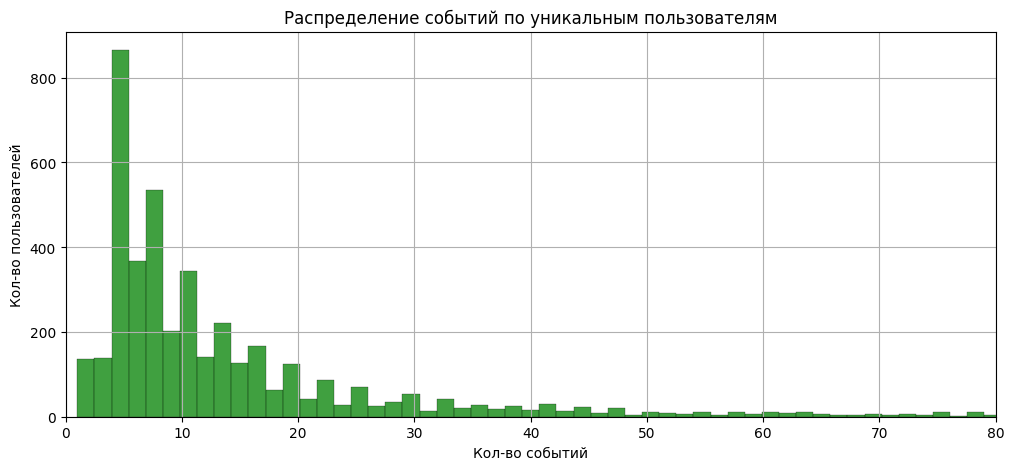

In [27]:
# построим гистограмму для наглядности
plt.figure(figsize=(12, 5))
sns.histplot(data=big_df.groupby('user_id')[['event_name']].count(), x='event_name', color = 'green')
plt.title('Распределение событий по уникальным пользователям')
plt.xlabel('Кол-во событий')
plt.ylabel('Кол-во пользователей')
plt.grid()
plt.xlim(0,80)
plt.show()

Медианное значение по совершенным действиям - 9 событий. Минимум - одно, можно предположить, что это те пользователи, которые кликнули и зашли в приложение, но потом решили выйти. Ранее мы уже увидели, что есть ряд пользователей, которые активно используют приложении и число событий которых достигают - 400 и выше. Возможно, это постоянные пользователи, которые решили продать/приобрести что-то из разных товарных категории, что и приводит к различным множественным событиям при использовании приложения.

**Посмотрим на выбросы с помощью диаграммы размаха**

In [28]:
# cоздадим диаграмму размаха (ящик с усами)
fig = px.box(events_for_users,
             x='event_name',
             title='Кол-во событий на пользователя',
             height=600,
             orientation='h')

# отобразим график
fig.update_layout(xaxis_title='Кол-во событий', yaxis_title='Кол-во пользователей')
fig.show()

Высокая пользовательская активность и большое кол-во совершаемых действий (до 478) в приложении могут быть обусловлены различными факторами, к примеру:

- **популярность функции:** если определенная функция приложения (например, просмотр карты, поиск) широко используется пользователями в повседневной жизни, это может привести к высокой активности и частым событиям;

- **удобно использовать:** простота и интуитивная понятность интерфейса приложения могут стимулировать пользователей к частому взаимодействию с ним, что увеличивает кол-во совершаемых действий и времени использования приложения.

- **качество контента:** если контент в приложении (фото, рекомендации к товарам, реклама и т.д.) интересны и полезны для пользователей, это может привести к частому его просмотру и кликам;

- **рекламные и маркетинговые активности, "распродажи черные пятницы":** эффективные маркетинговые кампании или активные рекламные кампании могут привлекать большое кол-во пользователей в приложение, что увеличивает кол-во совершаемых действий;

- **сезонные или временные факторы:** в зависимости от сезона или текущих событий (например, праздники, спортивные мероприятия вроде Чемпионата Европы по футболу 2024 и т.д.), **пользователи могут активнее использовать приложение, что приводит к увеличению количества событий.**

### Посмотрим на распределение событий (наиболее частые события и наименее);

In [29]:
# посмотрим на наиболее часто совершаемые события
top_events = big_df['event_name'].value_counts().reset_index()
top_events

,event_name,count
0,tips_show,40055
1,photos_show,10012
2,search,6784
3,advert_open,6164
4,contacts_show,4529
5,map,3881
6,favorites_add,1417
7,tips_click,814
8,contacts_call,541


Приведем наименование столбцов в порядок и переименуем.

In [30]:
# переименуем названия столбцов 'index' на 'event_name', а 'event_name' на 'count'
top_events = top_events.rename(columns={'index': 'event_name', 'event_name': 'count'})
top_events

,count,count
0,tips_show,40055
1,photos_show,10012
2,search,6784
3,advert_open,6164
4,contacts_show,4529
5,map,3881
6,favorites_add,1417
7,tips_click,814
8,contacts_call,541


In [31]:
# подсчитываем кол-во уникальных значений 'event_name' и сортируем
df_event = big_df['event_name'].value_counts().sort_values().to_frame()

# сбрасываем индексы, создаем новый столбец 'index', где индексы в новом порядке
df_event = df_event.reset_index()

# переименовываем столбцы
df_event.columns = ['event', 'cnt']

# сортируем df_event по столбцу 'cnt' в порядке убывания
df_event = df_event.sort_values(by='cnt', ascending=False)

# выводим результат
df_event

,event,cnt
8,tips_show,40055
7,photos_show,10012
6,search,6784
5,advert_open,6164
4,contacts_show,4529
3,map,3881
2,favorites_add,1417
1,tips_click,814
0,contacts_call,541


**Построим горизонтальную столбчатую диаграмму с количеством событий**

Где по оси X будет отображено кол-во событий, а по оси Y - типы наших событий.

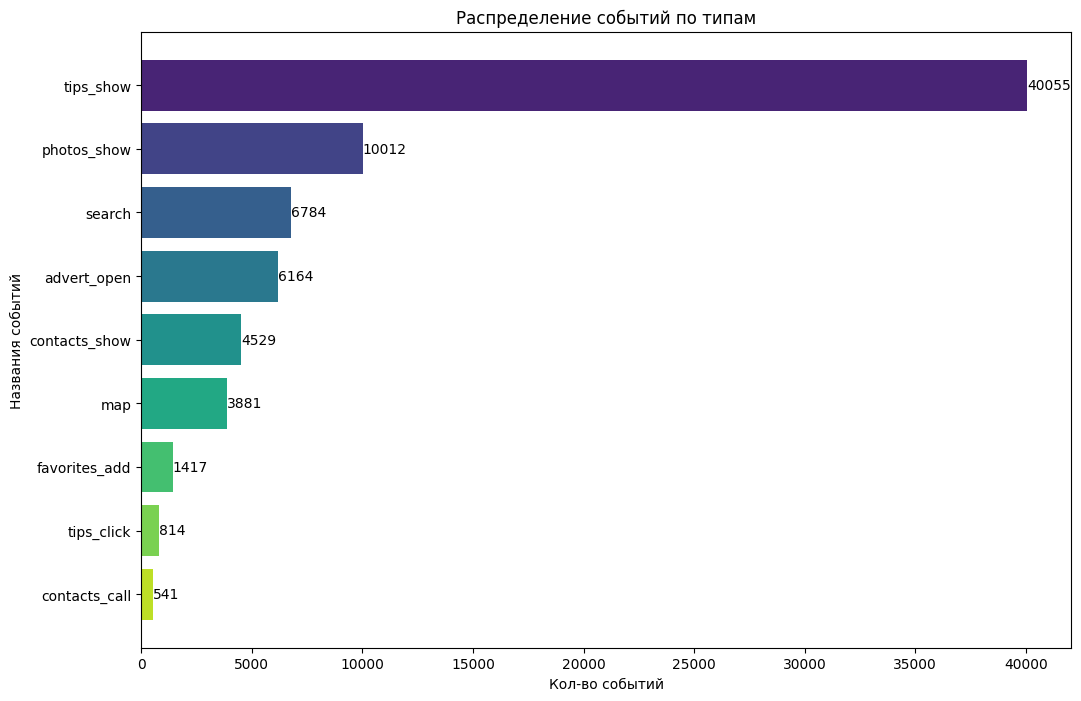

In [32]:
# настроим цвета и посчитает кол-во событий
palette = sns.color_palette("viridis", len(df_event))

# зададим параметры графика
plt.figure(figsize=(12, 8))
bars = plt.barh(df_event['event'], df_event['cnt'], color=palette)
plt.xlabel('Кол-во событий')
plt.ylabel('Названия событий') # указываем наименования осей
plt.title('Распределение событий по типам')
plt.gca().invert_yaxis()  # инвертируем ось y, чтобы наиболее частые события были наверху


# добавим числовые значений для наглядности
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}',
             va='center', ha='left', color='black', fontsize=10)

plt.show() # выведем наш график

- **Наибольший интерес к tips_show - "увидел рекомендованные объявления (40 055 событий)"**.

Рекомендации удобны тем, что могут быть предложены пользователю на основе его действий, например, алгоритмы могут учитывать его предыдущие просмотры, вкусы и интересы, поэтому логично, что клиенты проводят время в приложении, кликают и совершают открытие карточек наиболее релевантных и интересных объявлений для них.

- Высокая активность на этапе **просмотрел фотографий в объявлении (photos_show) - 10 012 событий**.
Говорит о том, что пользователи проявляют активность при изучении деталей конкретных объявлений. Когда пользователь просматривает фотографии, это может означать, что объявление заинтересовало его из-за визуальной привлекательности, красиво созданной фотографии или других важных деталей.

- Значительное кол-во пользователей **открыли карточки объявления (advert_open)**.
Указывает нам на то, что многие пользователи проявляют интерес к объявлениям в целом и готовы изучать доп. сведения о предложениях и товарах, открывая карточки для получения более подробной информации. И тут можно было бы добавить доп. функцию, например, предоставление доп.информации удобным для клиента образом (через письмо, онлайн-созвон или промо-материалы).

- Имеется **активное использование функции поиска (search)**. Пользователи часто используют поиск, ведь когда на рынке много разнообразного товара/услуг - имеет смысл поискать похожии, а затем сравнить по цене, качеству, комплектации и т.д.

- Наблюдается низкая активность (по сравнению с этапами выше) на этапе - **добавление в избранное (favorites_add) - 1 417 событий**, что ожидаемо, ведь купить что-то "сразу и сейчас" готовы не многие. И вот тут можно было бы подумать какую-нибудь маркетинговую акцию, как например "добавил в избранное и приобрел в течении 3-х дней - тогда получил доп.скидку 5-10%".

**Наименьший интерес - к звонкам по контактам (contacts_call) - 541 событие**. Малое кол-во пользователей начинают свое взаимодействие именно с этого события, что, возможно, обусловлено нежеланием созваниваться с незнакомым человеком, отсутствием времени на разговоры из-за занятости на работе, когда можно просто и быстро посмотреть отзыв/цену, и обдумать покупку и т.д.

**Посмотрим на процентуальное соотношение различных событий.**

In [33]:
# вычисляем %-ое соотношение каждого события в датасете
event_percent = big_df['event_name'].value_counts() / len(big_df['event_name']) * 100

# преобразуем результат в датасет и добавляем названия столбцов
event_percent = event_percent.to_frame()
event_percent.columns = ['events_%']

# сбрасываем индекс и добавляем столбец с названиями событий
event_percent = event_percent.reset_index()
event_percent.columns = ['event_name', 'events_%']

In [34]:
# вычисляем %-ое соотношение каждого события в big_df
event_percent = big_df['event_name'].value_counts(normalize=True) * 100

# преобразуем результат и добавляем названия столбцов
event_percent = event_percent.reset_index()
event_percent.columns = ['event_name', 'events_%']

# извлекаем значения для построения диаграммы
values = event_percent['events_%']
labels = event_percent['event_name']

# добавляем данные
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4,
                             marker_colors=px.colors.qualitative.Pastel)],
                layout_title_text='Доля каждого из событий')

# добавляем параметры
fig.update_layout(
    legend_title_text='События',
    margin=dict(l=50, r=50, t=50, b=50),
    width=850,
    height=450
)

# отображаем диаграмму
fig.show()

54% всех событий, совершенных пользователями, составляют tips_show ("увидел рекомендованные объявления"). Далее следует просмотр фотографии - 13,5% и поиск - 9,14%.

**Наименьшую долю** среди всех событий составляют такие действия, как "favorites_add (добавил в избранное)", "tips_click (кликнул по объявлению)" и "contacts_call (совершил звонок)". Доля каждого из этих событий составляет менее 2%.

### Проанализируем какие события чаще совершают целевые пользователи;

Для начала посмотрим, сколько уникальных пользователей совершали каждое из событий.

In [35]:
# определим функцию для расчета процента
def calculate_percent(total_users, unique_users):
    return (total_users / unique_users * 100)

# сгруппируем данные по 'event_name' и считаем уникальных пользователей для каждого события
grouped_df = big_df.groupby('event_name')['user_id'].nunique()

# отсортируем сгруппированные данные по числу уникальных пользователей и сбрасываем индекс
sorted_df = grouped_df.sort_values(ascending=False).reset_index()

# переименовываем колонку 'user_id' в 'total_users'
events_for_users = sorted_df.rename(columns={'user_id': 'total_users'})

# посчитаем общее число уникальных пользователей в исходном датасете
unique_users = big_df['user_id'].nunique()

# применяем функцию "calculate_percent" для расчета % и добавляем результат в новый столбец 'percent'
events_for_users['percent'] = events_for_users['total_users'].apply(calculate_percent, unique_users=unique_users)

# выводим результат
events_for_users

,event_name,total_users,percent
0,tips_show,2801,65.245749
1,search,1666,38.807361
2,map,1456,33.915677
3,photos_show,1095,25.506639
4,contacts_show,981,22.851153
5,advert_open,751,17.493594
6,favorites_add,351,8.176101
7,tips_click,322,7.500582
8,contacts_call,213,4.961565


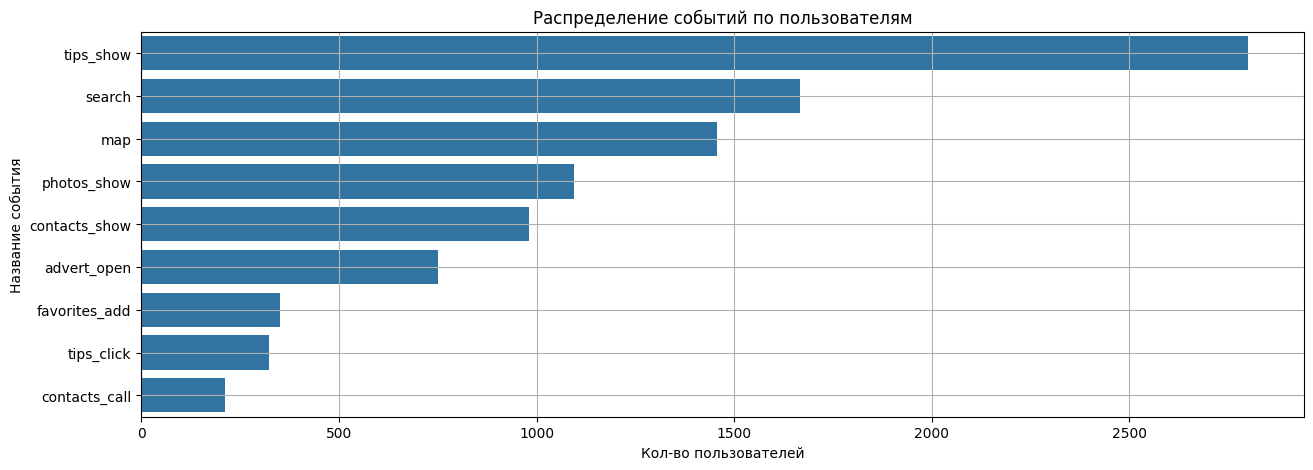

In [36]:
# построим столбчатую диаграмму
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=events_for_users, x='total_users', y='event_name')
plt.grid()
plt.title('Распределение событий по пользователям')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Название события')
plt.show()

**Показы рекомендованных объявлений (tips_show) и поиск (search)** - являются наиболее распространенными действиями, что указывает на их высокую востребованность среди пользователей приложения. Эти функции могут быть ключевыми для удержания пользователей и их взаимодействия с платформой.

Функции **карта (map) и показ фотографий (photos_show)**, также популярны и интересны пользователям, но в меньшей степени по сравнению с объявлениями и поиском. Это может означать, что **пользователи активно исследуют контент и информацию на платформе**.

Следует отметить, что такие функции, как добавление в избранное (favorites_add) и клики по объявлениям (tips_click), используются относительно редко. Это **может свидетельствовать о необходимости улучшения этих функций или их продвижения для повышения вовлеченности пользователей.**

**Звонки по контактам (contacts_call)** - являются самым редким действием 213 события (4.96%), что может указывать на предпочтение пользователей других способов связи.

**Посчитаем конверсию в просмотр контактов**

In [37]:
# выведем кол-во уникальных пользователей и конверсию в 'contacts_show' (просмотр контактов)
users_target = big_df[big_df['event_name'] == 'contacts_show']['user_id'].unique()
percent_contacts_show = round(len(users_target) / big_df['user_id'].nunique() * 100, 2) # округляем до 2 знаков после точки

print('Кол-во уникальных пользователей, посмотревших контакты (contacts_show):',len(users_target))
print(f"Доля пользователей, посмотревших контакты 'contacts_show': {percent_contacts_show}%")

Кол-во уникальных пользователей, посмотревших контакты (contacts_show): 981
Доля пользователей, посмотревших контакты 'contacts_show': 22.85%


### Проанализируем какие события чаще совершают целевые пользователи;

Разделим пользователей на две группы:
- те, кто совершил целевое действие;
- и те, кто нет.

И изучим, какие действия чаще всего совершают обе анализируемые группы.

In [38]:
# выберем действия целевых пользователей и сохраним их в переменную target_events
filtered_df_t = big_df[big_df['user_id'].isin(users_target)]
target_events = filtered_df_t['event_name'].value_counts().reset_index()
target_events # посмотрим, что получилось
target_events.columns = ['event_name', 'target'] # задаем корректные названия столбцов

# аналогично выбираем действия не целевых пользователей и сохраняем в other_events
filtered_df_o = big_df[~big_df['user_id'].isin(users_target)]
other_events = filtered_df_o['event_name'].value_counts().reset_index()

other_events # посмотрим результат
other_events.columns = ['event_name', 'other'] # задаем корректные названия столбцов

In [39]:
# подготовим информацию об общем кол-ве событий
total_events = big_df['event_name'].value_counts().reset_index()
total_events.columns = ['event_name', 'total_events'] # задаем корректные названия столбцов
total_events

,event_name,total_events
0,tips_show,40055
1,photos_show,10012
2,search,6784
3,advert_open,6164
4,contacts_show,4529
5,map,3881
6,favorites_add,1417
7,tips_click,814
8,contacts_call,541


**Подготовка столбцов для наших расчетов завершена, переходим к вычислениям**

In [40]:
# объединяем данные по общему столбцу 'event_name' и сохраняем в переменную target_final_table
target_final_table = target_events.merge(other_events, on='event_name', how='outer')
target_final_table = target_final_table.merge(total_events, on='event_name', how='left').fillna(0)

# узнаем какую долю составляет значение в столбце target от значения в столбце 'total_events'
target_final_table['target_%'] = (target_final_table['target'] / target_final_table['total_events'] * 100).round(2)

# теперь узнаем какую долю составляет значение в столбце 'other' к столбцу 'total_events'
target_final_table['other_%'] = (target_final_table['other'] / target_final_table['total_events'] * 100).round(2)

# отсортируем по общему кол-ву событий
target_final_table = target_final_table.sort_values(by='total_events', ascending=False)

# найдем относительные показатели и узнаем какой % составляет каждое значение от общей суммы
target_final_table['target_%_of_total'] = ((target_final_table['target'] / target_final_table['target'].sum()) * 100).round(2)
target_final_table['other_%_of_total'] = ((target_final_table['other'] / target_final_table['other'].sum()) * 100).round(2)

# выводим нашу таблицу
target_final_table

,event_name,target,other,total_events,target_%,other_%,target_%_of_total,other_%_of_total
0,tips_show,12768,27287.0,40055,31.88,68.12,46.95,58.06
2,photos_show,3828,6184.0,10012,38.23,61.77,14.08,13.16
3,search,2084,4700.0,6784,30.72,69.28,7.66,10.00
4,advert_open,1589,4575.0,6164,25.78,74.22,5.84,9.73
1,contacts_show,4529,0.0,4529,100.00,0.00,16.65,0.00
5,map,1101,2780.0,3881,28.37,71.63,4.05,5.91
7,favorites_add,424,993.0,1417,29.92,70.08,1.56,2.11
8,tips_click,333,481.0,814,40.91,59.09,1.22,1.02
6,contacts_call,541,0.0,541,100.00,0.00,1.99,0.00


In [41]:
# приводим значения в столбце 'other' к целочисленному типу, чтобы убрать нули после точки
target_final_table['other'] = target_final_table['other'].astype(int)
target_final_table

,event_name,target,other,total_events,target_%,other_%,target_%_of_total,other_%_of_total
0,tips_show,12768,27287,40055,31.88,68.12,46.95,58.06
2,photos_show,3828,6184,10012,38.23,61.77,14.08,13.16
3,search,2084,4700,6784,30.72,69.28,7.66,10.00
4,advert_open,1589,4575,6164,25.78,74.22,5.84,9.73
1,contacts_show,4529,0,4529,100.00,0.00,16.65,0.00
5,map,1101,2780,3881,28.37,71.63,4.05,5.91
7,favorites_add,424,993,1417,29.92,70.08,1.56,2.11
8,tips_click,333,481,814,40.91,59.09,1.22,1.02
6,contacts_call,541,0,541,100.00,0.00,1.99,0.00


**Посмотрим какая доля приходится на каждое из событий в разрезе общего числа событий**

In [42]:
# визуализируем
fig = go.Figure()

# добавляем настройки графика для целевой группы
fig.add_trace(
    go.Bar(
        x=target_final_table['event_name'],
        y=target_final_table['target_%_of_total'],
        marker=dict(color='green'),
        name='Группа с целевым действием',
        text=target_final_table['target_%_of_total'].map(lambda x: f'{x:.2f}%')
    )
)

# добавляем настройки графика для не целевой группы
fig.add_trace(
    go.Bar(
        x=target_final_table['event_name'],
        y=target_final_table['other_%_of_total'],
        marker=dict(color='red'),
        name='Группа без целевого действия',
        text=target_final_table['other_%_of_total'].map(lambda x: f'{x:.2f}%')
    )
)

# пропишем заголовки
fig.update_layout(
    title='Распределение кол-ва событий внутри целевой и нецелевой группы',
    title_x=0.5,
    xaxis_title='Тип события',
    yaxis_title='Доля от общего числа событий внутри группы',
    barmode='stack'
)

# выведем график
fig.show()

**Выводы:**
    
**tips_show (увидел рекомендованные объявления):** имеет наибольший процент как в целевой группе (46.95%), так и в нецелевой группе (58.06%). Это говорит о том, что просмотр объявлении является одним из наиболее распространенных событий для всех пользователей.

**contacts_show (посмотрел номер телефона)**: в целевой группе этот показатель - 16.65%, тогда как в нецелевой группе он равен 0%. Это свидетельствует о том, что показ контактов является актуальным только для целевой группы, кто намерен совершить звонок, что логично.

**tips_click (кликнул по рекомендованному объявлению)**: в обеих группах этот показатель примерно одинаков (1.22% в целевой и 1.02% в нецелевой группе), что говорит о равномерном и не высоком интересе к кликам по объявлениям среди всех пользователей.

**photos_show (просмотр фотографий)**: показатель практически одинаков в обеих группах (14.08% в целевой и 13.16% в нецелевой группе), что указывает на равномерное распределение интереса к фотографиям.

**map (открыл карту объявлений)**: здесь также наблюдается умеренное использование карты в обеих группах (4.05% в целевой и 5.91% в нецелевой группе).

**search (поиск):** в нецелевой группе процент (10.00%) выше, чем в целевой (7.66%). Это может указывать на то, что пользователи, не совершающие целевое действие, больше используют функцию поиска.

**advert_open (открыл карточки объявления)**: этот показатель также выше в нецелевой группе (9.73%) по сравнению с целевой (5.84%), что может говорить нам о большем интересе к просмотру разных объявлений среди пользователей, не совершающих целевое действие. Возможно, пользователи сравнивают похожие предложения по товарам.

**favorites_add (добавление в избранное)**: в обеих группах этот показатель низкий (1.56% в целевой и 2.11% в нецелевой группе), что может указывать на то, что функция добавления в избранное не пользуется большой популярностью.

**contacts_call (звонок по номеру)**: в целевой группе этот показатель составляет 1.99%, в нецелевой группе он равен 0%.

**contacts_show (посмотрел номер телефона)** и **звонки по контактам (contacts_call)** встречаются только в целевой группе.

**Функции поиска (search)** и **открытия объявления (advert_open)** - более популярны среди пользователей, не совершающих целевое действие. Это может указывать на то, что эти пользователи больше исследуют контент и сравнивают разные предложения.

**Показ фотографий (photos_show)** и **использование карты (map)** имеют схожие проценты в обеих группах, что говорит о равномерном интересе к этим функциям среди всех пользователей.

### Изучим распределение целевых пользователей по всем типам событий

Посмотрим, каким образом пользователи с целевым действием распределены по другим событиям.

In [43]:
# ранее мы создали датасет filtered_df_t, в котором только те user_id, что содержатся в списке users_target
filtered_df_t.head(10)

,event_time,event_name,user_id,source
12,2019-10-07 00:02:07.374346,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
24,2019-10-07 00:05:16.003328,contacts_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
28,2019-10-07 00:06:01.349291,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
32,2019-10-07 00:06:56.367054,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
35,2019-10-07 00:09:24.585200,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
39,2019-10-07 00:10:42.780304,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
42,2019-10-07 00:11:24.179485,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
48,2019-10-07 00:12:32.279587,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
51,2019-10-07 00:13:50.958627,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
53,2019-10-07 00:14:19.218279,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex


In [44]:
# группируем по столбцу event_name, сбрасываем индексы и сортируем
unique_target_users = (
    filtered_df_t.pivot_table(index='event_name', values='user_id', aggfunc='nunique')
    .reset_index()
    .sort_values(by='user_id', ascending=False)
)

In [45]:
# объединяем таблицы 'events_for_users' и 'unique_target_users' по столбцу 'event_name'
target_unique_table = (
    events_for_users.merge(unique_target_users, on='event_name', how='left')
                    .assign(conversion=lambda x: (x['user_id'] / x['total_users']) * 100)
                    .sort_values(by='conversion', ascending=False)
                    .drop(['percent'], axis=1, errors='ignore')
)

target_unique_table = target_unique_table.rename(columns={'user_id': 'target_action'}) # переименовываем
target_unique_table # выводим на экран с корректным названием столбца с целевым событием

,event_name,total_users,target_action,conversion
4,contacts_show,981,981,100.000000
8,contacts_call,213,213,100.000000
6,favorites_add,351,136,38.746439
7,tips_click,322,100,31.055901
3,photos_show,1095,339,30.958904
1,search,1666,377,22.629052
2,map,1456,289,19.848901
0,tips_show,2801,516,18.421992
5,advert_open,751,138,18.375499


In [46]:
# создаем график
fig = px.bar(target_unique_table,
             x='conversion',
             y='event_name',
             color='event_name',
             text=target_unique_table['conversion'].apply(lambda x: '{0:1.2f}%'.format(x)),
             color_discrete_sequence=px.colors.qualitative.Plotly)

# добавляем настройки
fig.update_traces(marker_line_color='white',  # зададим цвет границы столбцов
                  marker_line_width=3.5)      # определим ширину границы столбцов

# настроим заголовки
fig.update_layout(
    title='Распределение целевых пользователей по типу разных событий',
    xaxis_title='Доля пользователей, посмотревших контакты (%)',
    yaxis_title='Тип события',
    legend_title='Событие')

# выводим наш график
fig.show()


**contacts_show (просмотр контактов) и contacts_call (звонок по номеру)** имеют высокую конверсию (100%). Это ожидаемо и просто указывает на то, что пользователи, которые просматривают контактные данные - часто совершают звонки продавцам.

И **тут можно посоветовать**:
- следить, чтобы контактная информация была ясно отображена, была актуальна и легко доступна.
- для дополнительных мотиваций совершения звонков, можно внедрить специальные предложения или скидки при звонке сразу после просмотра контактов.

**favorites_add (добавление в избранное)** также показывает неплохую конверсию (почти 39%). 38.75% пользователей, добавивших объявление "в избранное" **затем дошли до целевого действия - просмотр контактов**.

**Рекомендация:**
- продолжать улучшать функционал "избранного", совершенствовать удобство его использования, возможно, добавив функции уведомлений о изменениях статуса объявлений или, например, добавив возможность напоминать, что в избранном - товар и если его приобрести сейчас начислятся, например, бонусные баллы или будет небольшая скидка.

Следует отметить, что только 22.6% пользователей, которые использовали "поиск" - дошли до целевого действия "просмотр контакта"

Для событий с конверсией менее 32%, таких как **tips_click (клик по рекомендованному объявлению), photos_show (просмотр фотографий), search (поиск), map (открытие карты объявлений), tips_show (показ рекомендованных объявлений) и advert_open (открытие объявления),** можно порекомендовать:

- улучшать визуальное оформление объявлений для повышения их привлекательности. Использовать качественную визуализацию приятную для просмотра;
- оптимизировать поиск и фильтрацию интересующих товаров, чтобы пользователи могли быстро найти интересующую их информацию/товар;
- использовать аналитику поведения пользователей для выявления возможных барьеров или неудобств в процессе использования приложения и их последующим устранении.
Можно, например, просить пользователей оценить приложение ответив на небольшое кол-во вопросов или поставить оценку по 5-ой шкале.

Мы **можем сделать вывод, что на конверсию в целевое событие (просмотр контакта) больше всего влияют:**
- удобство использования функции "добавить в избранное";
- качество и привлекательность фотографии в объявлениях;
- и правильно подобранные рекомендации, на которые кликает пользователь.

### Посчитаем метрики DAU и WAU

Ранее, мы выяснили, что наши данные охватывают 4 недели (28 дней).

Посчитаем метрики:

- **DAU ("Daily Active Users")** - кол-во уникальных пользователей, активно использующих продукт/сервис каждый день.
- **WAU ("Weekly Active Users")** - кол-во уникальных пользователей, активно использующих продукт каждую неделю.

In [47]:
big_df # выведем наш датасет

,event_time,event_name,user_id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74194,2019-11-03 23:56:57.041825,search,20850c8f-4135-4059-b13b-198d3ac59902,google
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


**Создадим в датасете отдельно столбцы с датой и для недели**

In [48]:
big_df['date'] = big_df.event_time.dt.date # столбец для даты
big_df['week'] = big_df.event_time.dt.isocalendar().week # столбец для номера недели
big_df # проверяем

,event_time,event_name,user_id,source,date,week
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,41
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,41
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,41
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,41
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,41
...,...,...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,44
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,44
74194,2019-11-03 23:56:57.041825,search,20850c8f-4135-4059-b13b-198d3ac59902,google,2019-11-03,44
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,2019-11-03,44


In [49]:
# посчитаем кол-во уникальных пользователей в день
DAU = big_df.groupby('date').agg({'user_id': 'nunique'}).mean()
print('Кол-во уникальных пользователей, использующих приложение каждый день:',int(DAU),'человек.')

Кол-во уникальных пользователей, использующих приложение каждый день: 279 человек.


In [50]:
# найдем кол-во уникальных пользователей в неделю
WAU = big_df.groupby('week').agg({'user_id': 'nunique'}).mean()
print('Кол-во уникальных пользователей, использующих приложение каждую неделю:',int(WAU),'человек.')

Кол-во уникальных пользователей, использующих приложение каждую неделю: 1382 человек.


**Визуализируем полученные метрики DAU ("Daily Active Users") и WAU ("Weekly Active Users")**

**Построение графика DAU**

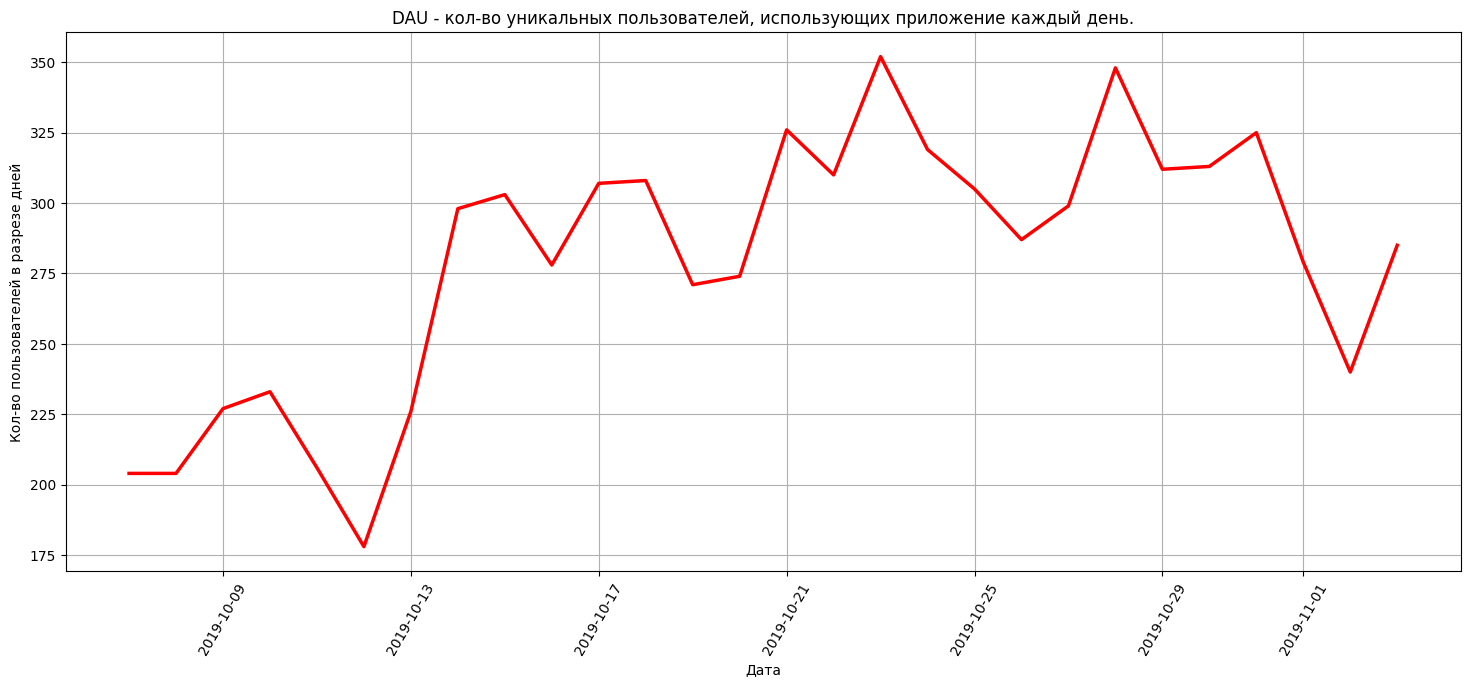

In [51]:
# вычисляем DAU
dau = big_df.groupby('date').agg({'user_id': 'nunique'})

# создаем параметры для визуализации
fig, ax_1 = plt.subplots(figsize=(18,7))
dau.plot(grid=True, legend=False, ax=ax_1, rot=60, color='red', linewidth=2.5)  # установим цвета и толщины
ax_1.set(title='DAU - кол-во уникальных пользователей, использующих приложение каждый день.',
         xlabel='Дата',
         ylabel='Кол-во пользователей в разрезе дней')

# график DAU
plt.show()

Из полученного графика по кол-во уникальных пользователей, использующих приложение каждый день, мы видим, что **пиковые отметки** приходятся примерно на 23 октября, где число пользователей было - 350 человек и примерно на 27 октября, где было около 348 пользователей. Далее наблюдается спад пользовательской активности, после чего мы наблюдаем новый рост после 3 ноября.

**Построение графика WAU**

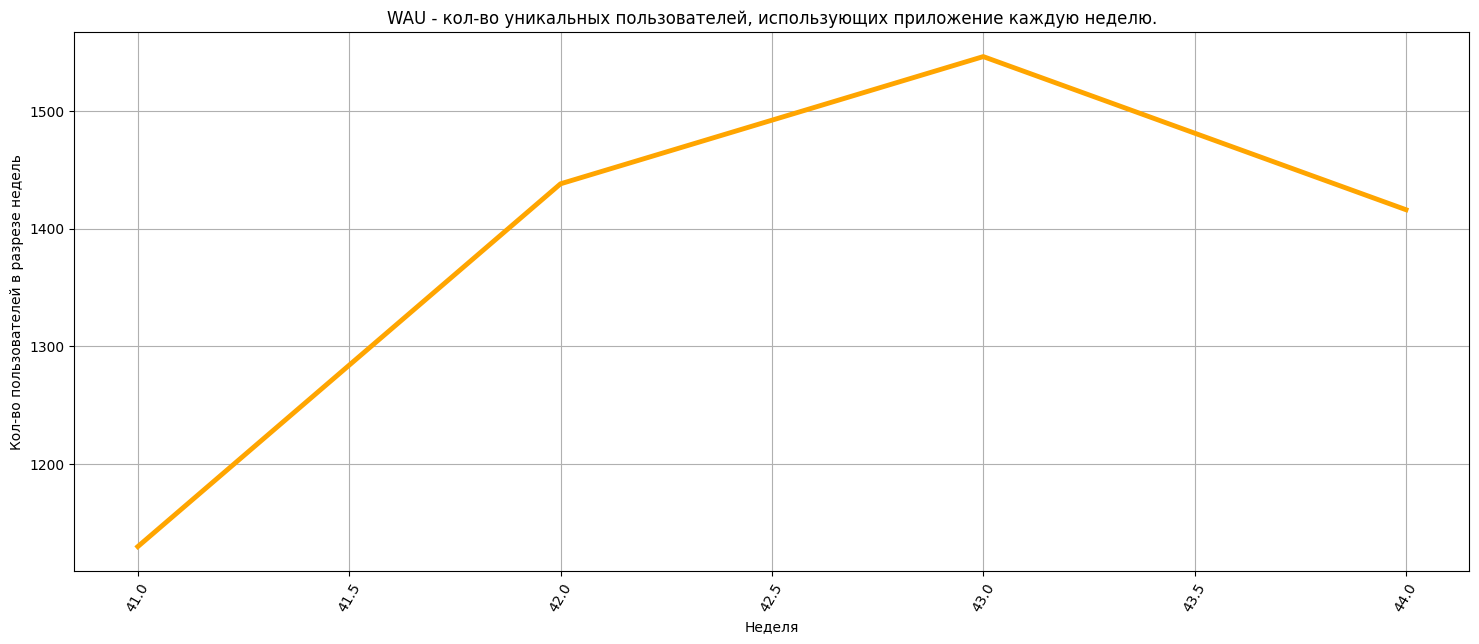

In [52]:
# вычисляем WAU
wau = big_df.groupby('week').agg({'user_id': 'nunique'})

# создаем параметры графика
fig, ax_2 = plt.subplots(figsize=(18, 7))
wau.plot(grid=True, legend=False, ax=ax_2, rot=60, color='orange', linewidth=3.5)  # установим цвета и толщины
ax_2.set(title='WAU - кол-во уникальных пользователей, использующих приложение каждую неделю.',
         xlabel='Неделя',
         ylabel='Кол-во пользователей в разрезе недель')

# выведем наш график WAU
plt.show()

Из полученных данных мы знаем, что в среднем приложением пользуется 1 382 пользователя в неделю.  Начиная с 41 недели, что по календарю соответсвует от 7 октября 2019 и на протяжении последующих 2 недель мы наблюдаем стабильный рост числа пользователей, что может быть обусловлено наличием действующих акции, или успешно проведенной рекламной компанией, которая поспособствовала привлечению пользовательского интереса.

**Промежуточные выводы по итогам исследовательского анализа данных:**

В датасете представлено **74 197 событий за период с 7 октября 2019 по 3 ноября 2019 года.** Всего зарегистрировано **4 293 уникальных пользователя.** Среднее кол-во событий на пользователя составляет 17, вместе с тем медианное значение равно - 9, что указывает на наличие числа активных пользователей, искажающих среднее, поэтому будем опираться на медиану.

По источнику трафика большинство пользователей (45.5%) пришли в приложение через систему "Yandex".

В среднем приложением пользуется 279 уникальных пользователей в день и 1 382 пользователя в неделю. При этом начиная с 7 октября 2019 и на протяжении последующих 2 недель мы наблюдаем стабильный рост числа пользователей, что может быть обусловлено наличием действующих акции, или успешно проведенной рекламной компанией, которая поспособствовала привлечением пользовательского интереса.

В данных представлены 9 видов событий. Самым частым событием является **tips_show (показ рекомендованных объявлений), за которым с следует photos_show (просмотр фотографии в объявлении), и на третьем месте search (поиск объявлений).**

**981 пользователь просмотрел контактную информацию, что составляет 22.3% от общего числа пользователей.**

Следует отметить, что **просмотр фотографий в объявлениях и клики по рекомендованным объявлениям положительно влияют на конверсию в целевое действие - просмотр контактов.**

## Проанализируем влияние событий на совершение целевого события - просмотра контактов

### Изучим пользовательские сессий. Определим тайм-аут между событиями. Выясним длительность сессий;

Выясним сколько пользователей доходят от предыдущего шага до следующего. Для этого мы разобьем наш датасет на пользовательские сессии. Будем определять время начала новой сессии по времени, которое прошло от предыдущего события. Активность каждого пользователя разная, стало быть и длительность сессий будет разной, как и кол-во совершенных за это время событий.

**Изучим пользовательские сессий**

**Отсортируем датасет по "user_id" и "event_time"**

In [53]:
# отсортируем датафрейм "user_id" и "event_time"
big_df = big_df.sort_values(['user_id', 'event_time'])

# рассчитаем время между соседними событиями
big_df['time_interval'] = (big_df.groupby('user_id')['event_time'].diff()
                     .dt.total_seconds().div(60) # преобразуем в минуты
                     .fillna(value=0) # заполним пропуски нулевым значением
                    )
big_df['time_interval'].describe(percentiles=[0.05, 1/4, 1/2, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95]) # задаем процентили

count    74197.000000
mean       219.537112
std       1488.939293
min          0.000000
5%           0.000000
25%          0.272607
50%          1.060508
90%         14.028356
91%         20.047997
92%         33.771810
93%         65.731040
94%        152.147053
95%        426.477334
max      38269.914225
Name: time_interval, dtype: float64

Медианное время между событиями - 1 минута. У 90% наших пользователей переход от одного события (действия) к другому занимает примерно 14 минут (14,02). Следует отметить, что от 94-го процентиля начинается резкое увеличение, что вероятно связано с выбросами в данных (аномально высокими значениями).

Из полученных данных мы видим, что:

- Всего измерений: 74 197.
- Среднее время между событиями: 219.54. А мы помним, что на среднее оказывают влияние аномально высокие значения в датасете, поэтому будем ориентироваться на медианное значение.

- Стандартное отклонение (показатель разброса значений): 1488.94.
- В 5% случаев время между событиями равно 0.
- 25% значений меньше 0.27.
- Медианное значение 50%: 1.06.
- 90% значений меньше 14.03.
- 91% значений меньше 20.05.
- 92% значений меньше 33.77.
- 93% значений меньше 65.73.
- 94% значений меньше 152.15.
- 95% значений меньше 426.48.

Согласно данным, 91-92% времени между событиями составляет **менее 30 минут.**

**Определим тайм-аут между событиями**

Согласно данным, 91-92% времени между событиями **составляет менее 30 минут.** Это означает, что большинство пользователей совершают действия с интервалом, меньшим получаса, что делает 30 минут **подходящим тайм-аутом для объединения событий в одну сессию.**

Установка тайм-аута в 30 минут позволит получить более осмысленные данные о взаимодействиях пользователей с приложением "Ненужные вещи". Поможет лучше понимать их поведение на сервисе. В отличии от более коротких тайм-аутов, 30 минут **позволит избежать чрезмерного увеличения и дробления пользовательских сессий**, что могло бы привести к некорректным выводам. Кроме того, временной промежуток в 30 минут хорошо отражает естественные перерывы в активности пользователей. Это достаточно долго, чтобы учесть небольшие перерывы (например, на чай, кофе). Вместе с тем, по жизненному опыту мы понимаем, что пользователи часто выполняют задачи, которые требуют нескольких шагов в рамках одного сеанса. Промежуток в 30 минут позволяет включить в одну сессию такие сценарии, что тоже будет правильно для верных итоговых выводов и рекомендации.
Более же длительные тайм-ауты могут начать объединять слишком разрозненные действия, которые не связаны друг с другом логически, что приведет к некорректным выводам.

In [54]:
# определим наш тайм-аут между событиями в "30 минут"
timeout = (big_df.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()

# добавляем в датасет столбец с номером сессии
big_df['session_id'] = big_df.groupby(['user_id', timeout], sort=False).ngroup() + 1
big_df

,event_time,event_name,user_id,source,date,week,time_interval,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,0.000000,1
806,2019-10-07 13:40:31.052909,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,0.751059,1
809,2019-10-07 13:41:05.722489,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,0.577826,1
820,2019-10-07 13:43:20.735461,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,2.250216,1
830,2019-10-07 13:45:30.917502,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,2.169701,1
...,...,...,...,...,...,...,...,...
72584,2019-11-03 15:51:23.959572,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,44,0.464775,10368
72589,2019-11-03 15:51:57.899997,contacts_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,44,0.565674,10368
72684,2019-11-03 16:07:40.932077,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,44,15.717201,10368
72688,2019-11-03 16:08:18.202734,tips_show,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,google,2019-11-03,44,0.621178,10368


Теперь в исходном датасете big_df есть данные об уникальных идентификаторах событий и мы знаем к какой сессии относится то или иное событие (действие). Всего у нас получилось 10 368 сессий.

**Узнаем распределение кол-ва событий по сессиям**

In [55]:
# посмотрим на кол-во событий в разрезе пользовательских сессий
count_event_session = big_df.groupby('session_id')['event_name'].count()

# посмотрим на описательную статистику кол-ва событий на сессию методом describe()
count_event_session.describe()

count    10368.000000
mean         7.156346
std          9.581106
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        149.000000
Name: event_name, dtype: float64

Из полученных данных мы видим, что среднее значение - 7 событии на сессию, но при этом мы помним, что у нас в датасете есть особенно активные пользователи, которые будет являться аномально высокими и влиять на показатель среднего. Поэтому в качестве ориентира **будем брать медианное значение равное 4 событиям в сессию.**

**Изучим длительность пользовательских сессий**

In [56]:
# группируем данные по сессиям и определим время начала и окончания пользовательской сессии
sessions_duration = big_df.groupby(['user_id','session_id']).agg(session_begin = ('event_time', 'min'),
                                                session_end = ('event_time', 'max')).reset_index()
# считаем разницу между концом и началом сессии
sessions_duration['duration_min'] = (sessions_duration['session_end']
                                          - sessions_duration['session_begin']).dt.total_seconds().div(60)

# посмотим описательную статистику сессий с помощью метода describe()
sessions_duration[['duration_min']].describe()

,duration_min
count,10368.000000
mean,12.877877
std,19.860189
min,0.000000
25%,0.352286
50%,5.586162
75%,17.423189
max,321.971605


Из полученных данных мы видим, что:

- Количество наблюдений (count): 10 368.
- Среднее значение (mean) длительности сессии составляет около 12.87 минут.
- Стандартное отклонение (std) равно приблизительно 19.86 минут, что указывает на значительный разброс значений вокруг среднего.
- Минимальное и максимальное значения (min и max) длительности сессии составляет 0 минут, максимальное - 321.97 минут (примерно 5 часов и 22 минут).
- Квартили: 25% сессий имеют длительность менее 0.35 минуты (примерно 21 секунду); медианное значение (50%) интересное нам: длительность составляет около 5.59 минут, и 75% сессий имеют длительность менее 17.42 минут.
- Средняя длительность сессии (12.88 минут) выше медианы (5.59 минут), что также указывает на наличие аномально длинных сессий, влияющих на среднее значение.

### Посмотрим какое кол-во сессий приходится на одного пользователя

In [57]:
# посмотрим сколько сессий приходится на одного нашего пользователя
session_count = big_df.groupby('user_id')['session_id'].nunique().reset_index()

# выведем описательную статистику кол-ва сессий на пользователя
session_count.describe()

,session_id
count,4293.000000
mean,2.415094
std,3.536466
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,99.000000


In [58]:
# построим диаграмму по кол-ву сессий на одного пользователя
fig = px.box(session_count, x='session_id',
             title='Диаграмма размаха количества сессий на пользователя',
             height=500,
             orientation='h'
            )
fig.update_layout(xaxis_title='Кол-во сессий', yaxis_title='Пользователи')
fig.show()

Из полученных данных мы видим, что:

- В наших данных содержится 4 293 сессии.
- Среднее количество сессий составляет примерно 2.4.
- Медианное значение (50%): равно 1.
- Размах в данных составляет от 1 до 99 сессий (максимум).
- 25% (Q1): Первый квартиль равен 1, что означает, что 25% сессий имеют кол-во 1.
- 75% (Q3): Третий квартиль равен 3, что аналогично означает, что 75% сессий имеют кол-во 3 или меньше.

Для увеличения кол-ва сессий можно рассмотреть улучшение пользовательского опыта, с помощью, например, постоянного совершествование интерфейса приложения. Кроме того, можно проводить программы возвращения пользователей, например при помощи бонусных баллов за возвращение к использованию. Также, можно провести внедрение программ лояльности, когда постоянным пользователям дарятся приятные подарки, скидки за постоянное использование приложения или иные бонусы.

### В разрезе сессий отберем поведенческие сценарии, которые приводят к целевому действию (просмотр контактов)

Выделим поведенческие сценарии пользователей приложения на основе сессии. Для этого определим, в каком порядке и в каком объеме происходят переходы от одних событий к другим.

**Оставим внутри сессии только уникальные события**

In [59]:
# взглянем на кол-во дубликатов
big_df.duplicated(subset=['session_id', 'event_name']).sum()

56343

**Удалим повторяющиеся события внутрии сессии**

In [60]:
# удалим повторяющиеся события внутри одной сессии
big_df_new = big_df.drop_duplicates(subset=['session_id', 'event_name'])
big_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17854 entries, 805 to 72552
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   event_time     17854 non-null  datetime64[ns]
 1   event_name     17854 non-null  object        
 2   user_id        17854 non-null  object        
 3   source         17854 non-null  object        
 4   date           17854 non-null  object        
 5   week           17854 non-null  UInt32        
 6   time_interval  17854 non-null  float64       
 7   session_id     17854 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.2+ MB


Из полученных данных мы видим, что осталось 17 854 значении. При этом, мы также видим, что следует привести в порядок тип наших данных.

**Преобразуем типы данных, чтобы они были корректными**

In [61]:
# преобразуем данные столбца "date" в datetime64
big_df_new['date'] = pd.to_datetime(big_df_new['date'])

# преобразуем данные столбца week в int64
big_df_new['week'] = big_df_new['week'].astype('int64')

# проверим типы
print(big_df_new.dtypes)

event_time       datetime64[ns]
event_name               object
user_id                  object
source                   object
date             datetime64[ns]
week                      int64
time_interval           float64
session_id                int64
dtype: object


Преобразование типов завершенно. Взглянем на наш датасет big_df_new

In [62]:
big_df_new.head() # посмотрим на первые строки нашего нового датасета

,event_time,event_name,user_id,source,date,week,time_interval,session_id
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07,41,0.000000,1
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,41,3164.231022,2
6565,2019-10-09 18:40:28.738785,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-09,41,5.007963,2
36412,2019-10-21 19:52:30.778932,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-21,43,17350.130250,3
36419,2019-10-21 19:53:38.767230,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-21,43,0.360037,3


**В разрезе сессий отберем поведенческие сценарии, которые приводят к целевому действию (просмотру контактов)**

In [63]:
# найдем все 'session_id', в которых есть целевое действие 'contacts_show'
target_sessions = big_df_new[big_df_new['event_name'] == 'contacts_show']['session_id'].unique()

# отфильтруем датасет по этим 'session_id'
filtered_df = big_df_new[big_df_new['session_id'].isin(target_sessions)]

# отсортируем данные по 'session_id' и 'event_time'
filtered_df = filtered_df.sort_values(by=['session_id', 'event_time'])

# сгруппируем данные по 'session_id' и объединим 'event_name' в список для каждой сессии
session_patterns = filtered_df.groupby('session_id')['event_name'].apply(list).reset_index()

# выведем первых 10 строк результата
print(session_patterns.head(10))

   session_id                                         event_name
0           6  [search, photos_show, favorites_add, contacts_...
1           8  [search, photos_show, contacts_show, contacts_...
2           9               [search, photos_show, contacts_show]
3          10                                    [contacts_show]
4          18                     [contacts_show, contacts_call]
5          19             [search, contacts_show, contacts_call]
6          23                         [contacts_show, tips_show]
7          27                                    [contacts_show]
8          30                    [map, tips_show, contacts_show]
9          32                            [contacts_show, search]


**Добавим столбец с кол-вом событий в каждой сессии**

In [64]:
# подсчитаем кол-во событий в каждой сессии и создадим новый столбец "event_count"
session_patterns['event_count'] = session_patterns['event_name'].apply(len)

# выведем на экран первые 10 строк датасета "session_patterns"
print(session_patterns.head(10))

   session_id                                         event_name  event_count
0           6  [search, photos_show, favorites_add, contacts_...            5
1           8  [search, photos_show, contacts_show, contacts_...            6
2           9               [search, photos_show, contacts_show]            3
3          10                                    [contacts_show]            1
4          18                     [contacts_show, contacts_call]            2
5          19             [search, contacts_show, contacts_call]            3
6          23                         [contacts_show, tips_show]            2
7          27                                    [contacts_show]            1
8          30                    [map, tips_show, contacts_show]            3
9          32                            [contacts_show, search]            2


Для того чтобы ответить на вопрос о кол-ве поведенческих сценариев, которые приводят к целевому действию 'contacts_show' (просмотру контактов), нам нужно посчитать кол-во уникальных комбинаций событий (event_name), в которых содержится 'contacts_show'.

In [65]:
# подсчитаем кол-во уникальных сценариев, содержащих целевое событие "просмотр контактов"
unique_patterns_count = session_patterns.shape[0]

print("Кол-во уникальных поведенческих сценариев с целевым событием (просмотр контактов):", unique_patterns_count, "сценариев")

Кол-во уникальных поведенческих сценариев с целевым событием (просмотр контактов): 1703 сценариев


**Отфильтруем сценарии по их популярности (количеству вхождений)**

In [66]:
# найдем кол-во вхождений каждого сценария
scenario_counts = session_patterns['event_name'].apply(tuple).value_counts().reset_index(name='count')

# отсортируем по кол-ву вхождений в убывающем порядке
scenario_counts = scenario_counts.sort_values(by='count', ascending=False)

# сохраним в переменную первые 15 популярных сценариев
top_15_scenarios = scenario_counts.head(15)

print(top_15_scenarios) # посмотрим на них

                                     event_name  count
0                    (tips_show, contacts_show)    342
1                              (contacts_show,)    195
2                (contacts_show, contacts_call)    120
3               (map, tips_show, contacts_show)     94
4                  (photos_show, contacts_show)     85
5                    (contacts_show, tips_show)     74
6        (search, contacts_show, contacts_call)     54
7                       (search, contacts_show)     52
8          (search, photos_show, contacts_show)     45
9                  (contacts_show, photos_show)     38
10  (photos_show, contacts_show, contacts_call)     35
11           (search, tips_show, contacts_show)     33
12  (contacts_show, contacts_call, photos_show)     26
13              (map, contacts_show, tips_show)     25
14       (tips_show, contacts_show, tips_click)     24


### Построим воронки сценариев, которые приводят к целевому действию.
Проанализируем поведение пользователей и узнаем сколько человек доходят от пред. шага до следующего.

In [67]:
# сортируем по 'session_id' и 'event_time'
table = big_df_new.sort_values(by=['session_id', 'event_time']).copy()

# добавляем шаг ('step') событий
table['step'] = table.groupby('session_id').cumcount() + 1

# добавляем источники и целевые узлы
table['source'] = table['event_name']
table['target'] = table.groupby('session_id')['source'].shift(-1)

# выводим первые строки датасета с новыми столбцами
table.head()

,event_time,event_name,user_id,source,date,week,time_interval,session_id,step,target
805,2019-10-07 13:39:45.989359,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-07,41,0.000000,1,1,NaN
6541,2019-10-09 18:33:55.577963,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,map,2019-10-09,41,3164.231022,2,1,tips_show
6565,2019-10-09 18:40:28.738785,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-09,41,5.007963,2,2,NaN
36412,2019-10-21 19:52:30.778932,tips_show,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,2019-10-21,43,17350.130250,3,1,map
36419,2019-10-21 19:53:38.767230,map,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,map,2019-10-21,43,0.360037,3,2,NaN


Мы видим, что данные в столбцах "event_name" и "source" - совпадают и для текущего анализа, мы можем удалить столбец event_name в данном датасете. Кроме того, столбец с датой и номером недели тоже можно убрать.

In [68]:
# удаляем столбцы 'event_name', 'week' и 'date' из 'table'
table = table.drop(columns=['event_name', 'week', 'date'])

# выводим первые несколько строк обновленного датасета, чтобы убедиться в изменениях
table.head()

,event_time,user_id,source,time_interval,session_id,step,target
805,2019-10-07 13:39:45.989359,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,0.000000,1,1,NaN
6541,2019-10-09 18:33:55.577963,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,map,3164.231022,2,1,tips_show
6565,2019-10-09 18:40:28.738785,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,5.007963,2,2,NaN
36412,2019-10-21 19:52:30.778932,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,tips_show,17350.130250,3,1,map
36419,2019-10-21 19:53:38.767230,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,map,0.360037,3,2,NaN


**Построим первую воронку событий, которая начинается с просмотра объявлений на карте ("map").**

In [69]:
# сначала мы убедимся, что таблица отсортирована по 'session_id' и 'event_time'
table = table.sort_values(by=['session_id', 'event_time'])

# находим пользователей, которые сначала совершили действие 'map' (посмотрели карту)
step_one = table[table['source'] == 'map'][['user_id', 'session_id', 'event_time']]
step_one['step'] = 'map'

# находим пользователей, которые совершили 'tips_show' вторым шагом после 'map'
step_two = table[table['source'] == 'tips_show']
step_two = step_two.merge(step_one, on=['user_id', 'session_id'], suffixes=('', '_prev'))
step_two = step_two[step_two['event_time'] > step_two['event_time_prev']][['user_id', 'session_id', 'event_time']]
step_two['step'] = 'tips_show'

# теперь находим пользователей, которые совершили 'contacts_show' после второго шага 'tips_show'
step_three = table[table['source'] == 'contacts_show']
step_three = step_three.merge(step_two, on=['user_id', 'session_id'], suffixes=('', '_prev'))
step_three = step_three[step_three['event_time'] > step_three['event_time_prev']][['user_id', 'session_id', 'event_time']]
step_three['step'] = 'contacts_show'

# затем мы включим кол-во пользователей по каждому этапу в отдельный список
map_list = [
    step_one['user_id'].nunique(), # и найдем их кол-во
    step_two['user_id'].nunique(),
    step_three['user_id'].nunique()
]

# для визуализации воронки мы определяем цепочку событий
funnel_one_map = ['map', 'tips_show', 'contacts_show']

# визуализируем первую воронку событий
fig = go.Figure()
fig.add_trace(go.Funnel(
    x=map_list,
    y=funnel_one_map, # добавим нашу цепь событий и задаем параметры
    marker_color=('#8C0000', '#BD2000', '#FA1E0E'),
    textinfo="value+percent initial+percent previous"
))
fig.update_layout(title='Воронка событий пользователей, использующих карту объявлений')

fig.show() # выводим нашу первую воронку

Всего пользователей с map - 1 456 пользователей. От данного значения и начнем анализ. Из предоставленной информации можно сделать следующие выводы:

- Из 100% пользователей, **начавших с просмотра карты (map)**, до просмотра контактов доходят 8% или 120 пользователей. Улучшение пользовательского опыта на этапе "просмотр карты", **например, обновление данной функции с учетом пожелании пользователей может увеличить конверсию.**

- После "просмотра карты" на следующий этап "просмотра рекомендаций" ("tips_show") из 1 456 доходит только 995 пользователей т.е. теряется 461 человек. Это может указывать на **необходимость улучшения содержания, визуальной составляющей объявлении или пользовательского опыта на этом этапе**, чтобы удержать большее число пользователей в приложении.

- Общая конверсия: 8% пользователей, начавших с этапа просмотра карты, доходят до целевого действия - *просмотр контактов*, что свидетельствует о необходимости оптимизации всего пути пользователя от начала до целевого события.

### Построим вторую воронку сценария, которая начинается с поиска в приложении "Ненужные вещи"

**Построим вторую воронку событий, которая начинается с "поиска"**

In [70]:
# также убедимся, что таблица отсортирована по 'session_id' и 'event_time'
table = table.sort_values(by=['session_id', 'event_time'])

# находим пользователей, которые совершили сначала 'search' ('поиск')
step_one = table[table['source'] == 'search'][['user_id', 'session_id', 'event_time']]
step_one['step'] = 'search'

# cчитаем кол-во уникальных пользователей на первом шаге
num_users_search = step_one['user_id'].nunique()

# теперь находим пользователей, которые совершили 'photos_show' после 'search'
step_two = table[table['source'] == 'photos_show']
step_two = step_two.merge(step_one, on=['user_id', 'session_id'], suffixes=('', '_prev'))
step_two = step_two[step_two['event_time'] > step_two['event_time_prev']][['user_id', 'session_id', 'event_time']]
step_two['step'] = 'photos_show'

# далее посчитаем кол-во уникальных пользователей на втором шаге
num_users_photos_show = step_two['user_id'].nunique()

# теперь находим пользователей, которые совершили 'contacts_show' после 'photos_show'
step_three = table[table['source'] == 'contacts_show']
step_three = step_three.merge(step_two, on=['user_id', 'session_id'], suffixes=('', '_prev'))
step_three = step_three[step_three['event_time'] > step_three['event_time_prev']][['user_id', 'session_id', 'event_time']]
step_three['step'] = 'contacts_show'

# посчитаем кол-во уникальных пользователей на третьем шаге
num_users_contacts_show = step_three['user_id'].nunique()

# включим кол-во пользователей по каждому шагу в отдельный список
search_list = [num_users_search, num_users_photos_show, num_users_contacts_show]

# для визуализации воронки мы определяем вторую цепочку событии
funnel_two_search = ['search', 'photos_show', 'contacts_show']

# визуализируем вторую воронку событий
fig = go.Figure()
fig.add_trace(go.Funnel(
    x=search_list,
    y=funnel_two_search, # задаем параметры
    marker_color=('#371B58', '#4C3575', '#7858A6'),
    textinfo="value+percent initial+percent previous"
))
fig.update_layout(title='Воронка событий пользователей, использующих поиск')

fig.show() # выведем нашу вторую воронку на экран

Всего пользователей с search (поиск) - 1 666 пользователей. От данного значения также и начнем анализ. Из полученных данных можно сделать выводы:

- **Из 100% пользователей (1 666 человек), начавших с "поиска", до просмотра контактов доходят 4% (59 пользователей)**. Это означает, что поиск подразумевает невысокую заинтересованность пользователя что-то приобрести или наоборот продать и доити до контактов. Но, **можно было бы оптимизировать саму поисковую систему для более удобного использования**, например внедрив быстрые рекомендации похожие на запросы, что пользователь уже делал.

- После этапа по поиску, только 478 человека приступают к просмотру фото и теряется очень большое кол-во пользователей, а именно 1 188 человек. Это может указывать на необходимость улучшения визуальной привлекательности материалов в приложении, чтобы удерживать большее число пользователей и мотивировать их на просмотр фото контента.

Общая конверсия: 4% пользователей (или 59 человек), начавших с этапа поиска, доходят до целевого действия - *просмотр контакта*, что свидетельствует о необходимости совершенствования всего пути движения пользователя от начала и до целевого действия.

### Построим третью воронку, где после "поиска" пользователи решили "посмотреть объявления"

In [71]:
# также сначала таблицу отсортируем по 'session_id' и 'event_time'
table = table.sort_values(by=['session_id', 'event_time'])

# затем находим пользователей, которые совершили сначала поиск ('search')
step_one = table[table['source'] == 'search'][['user_id', 'session_id', 'event_time']]
step_one['step'] = 'search'

# посчитаем кол-во уникальных пользователей на первом шаге
num_users_search = step_one['user_id'].nunique()

# далее мы находим пользователей, которые совершили 'tips_show' после 'search'
step_two = table[table['source'] == 'tips_show']
step_two = step_two.merge(step_one, on=['user_id', 'session_id'], suffixes=('', '_prev'))
step_two = step_two[step_two['event_time'] > step_two['event_time_prev']][['user_id', 'session_id', 'event_time']]
step_two['step'] = 'tips_show'

# теперь мы посчитаем кол-во уникальных пользователей на втором шаге
num_users_tips_show = step_two['user_id'].nunique()

# находим пользователей, которые совершили 'contacts_show' после 'tips_show'
step_three = table[table['source'] == 'contacts_show']
step_three = step_three.merge(step_two, on=['user_id', 'session_id'], suffixes=('', '_prev'))
step_three = step_three[step_three['event_time'] > step_three['event_time_prev']][['user_id', 'session_id', 'event_time']]
step_three['step'] = 'contacts_show'

# посчитаем кол-во уникальных пользователей на третьем шаге
num_users_contacts_show = step_three['user_id'].nunique()

# теперь мы включаем кол-во пользователей по каждому шагу в отдельный список
search_list = [num_users_search, num_users_tips_show, num_users_contacts_show]

# определяем цепочку событии для нашей воронки
funnel_three_search = ['search', 'tips_show', 'contacts_show']

# визуализируем воронку
fig = go.Figure()
fig.add_trace(go.Funnel(
    x=search_list,
    y=funnel_three_search, # настроим параметры воронки
    marker_color=('#FFB200', '#FFCB42', '#FFE61B'),
    textinfo="value+percent initial+percent previous"
))
fig.update_layout(title='Воронка событий пользователей, использующих поиск')

fig.show() # выводим на экран

Из полученных данных мы можем сделать выводы. Всего пользователей с search (поиск) - 1 666 пользователей.

- **1 666 пользователей, начавших с этапа "поиска", только 59 пользователей (4%) доходят до просмотра контактов**, если вторым шагом у них - просмотр объявлений. Эта низкая конверсия указывает на необходимость пересмотра и улучшения текущего процесса привлечения пользователей к контактной информации и к улучшению визуальной состовляющей самих объявлений (к примеру, привлекая професииональных фотографов и дизайнеров для их составления), что стимулировало бы пользовательский интерес и возможно, привело бы к большему числу "целевых действии" - просмотру контактов.

- После этапа поиска теряется значительное количество пользователей, что подчеркивает необходимость оптимизации пользовательского опыта на этом переходном этапе. Возможно, стоит провести мониторинг, чтобы понять причины оттока, как вариант **можно провести анкетирование/опрос пользователей с целью узнать причины прекращения использования приложения.**

- Только 4% пользователей (59 человек), начавших с этапа "поиска", достигают целевого действия (просмотр контакта).
Как возможный вариант по улучшению конверсии, можно попробовать обновить интерфейс приложения для улучшения удобства использования и навигации на ключевых этапах и внедрить программы лояльности за пользование приложением длительное время (бонусы, приятные подарки, скидки) что может снизить отток пользователей и повысить их активность при использовании приложения.

**Посмотрим на общее кол-во сессии в группе**

In [72]:
# подсчитаем общее кол-во сессий в каждой группе
total_sessions = big_df_new.groupby('session_id').size().reset_index(name='session_count')

# определим группы пользователей, которые смотрели "contacts_show" (целевое действие)
filtered_df = big_df_new[big_df_new['event_name'] == 'contacts_show']
showed_contacts_sessions = filtered_df['session_id'].unique()

# разделим на 2 группы: те, кто смотрел контакты и те, кто не смотрел
showed_contacts_count = len(showed_contacts_sessions)
not_showed_contacts_count = len(total_sessions['session_id']) - showed_contacts_count

# рассчитаем относительные частоты
total_sessions_count = len(total_sessions['session_id'])
relative_frequency_show = showed_contacts_count / total_sessions_count
relative_frequency_not_show = not_showed_contacts_count / total_sessions_count

print(f"Относительная частота события 'просмотр контактов (contacts_show)':\nСмотрели контакты: {relative_frequency_show}\nНе смотрели контакты: {relative_frequency_not_show}")


Относительная частота события 'просмотр контактов (contacts_show)':
Смотрели контакты: 0.1642554012345679
Не смотрели контакты: 0.8357445987654321


In [73]:
# фильтрация для пользователей, просмотревших контакты
users_show_contacts = big_df_new[big_df_new['event_name'] == 'contacts_show']['session_id'].unique()

# фильтрация данных для этих пользователей
filtered_data_show_contacts = big_df_new[big_df_new['session_id'].isin(users_show_contacts)]

# подсчет частоты каждого типа действия среди пользователей, просмотревших контакты
action_counts_show_contacts = filtered_data_show_contacts['event_name'].value_counts().reset_index()
action_counts_show_contacts.columns = ['event_name', 'count_show_contacts']

# подсчет общей частоты каждого типа действия среди всех пользователей
action_counts_total = big_df_new['event_name'].value_counts().reset_index()
action_counts_total.columns = ['event_name', 'count_total']

# объединяем данные для сравнения
action_comparison = pd.merge(action_counts_show_contacts, action_counts_total, on='event_name', how='left')

# рассчет доли среди пользователей, просмотревших контакты
action_comparison['fraction_show_contacts'] = action_comparison['count_show_contacts'] / len(users_show_contacts)

# рассчет доли среди всех пользователей
action_comparison['fraction_total'] = action_comparison['count_total'] / len(big_df_new['session_id'].unique())

# результат
print(action_comparison)

      event_name  count_show_contacts  count_total  fraction_show_contacts  \
0  contacts_show                 1703         1703                1.000000   
1      tips_show                  849         6035                0.498532   
2         search                  388         2974                0.227833   
3    photos_show                  347         2526                0.203758   
4  contacts_call                  312          312                0.183206   
5            map                  304         2133                0.178509   
6    advert_open                  135         1254                0.079272   
7  favorites_add                  112          501                0.065766   
8     tips_click                   92          416                0.054022   

   fraction_total  
0        0.164255  
1        0.582079  
2        0.286844  
3        0.243634  
4        0.030093  
5        0.205729  
6        0.120949  
7        0.048322  
8        0.040123  


Среди пользователей, просмотревших контакты, самым часто совершаемым действием является tips_show.
События tips_show, search и photos_show также имеют значительные частоты среди пользователей, просмотревших контакты, составляя соответственно 49.85%, 22.78% и 20.38% от всех действий этой группы, что указывает на их интерес к поиску информации и взаимодействию с контентом.
В общем случае событие contacts_show составляет только 16.43% от всех событий.

Относительная частота каждого действия (fraction_show_contacts) среди пользователей, просмотревших контакты, показывает, насколько каждое действие более часто совершается этой группой по сравнению с общей аудиторией (fraction_total).

## Проверим статистические гипотезы

### Гипотеза №1:

Одни пользователи выполняют действия 'tips_show' и 'tips_click', другие — только 'tips_show'. Проверим гипотезу **о том, что конверсия в просмотры контактов различается между этими двумя группами.**

- Н0: конверсия в просмотры контактов не различается между группами, выполняющими действия 'tips_show + tips_click' и только 'tips_show';
- Н1: конверсия в просмотры контактов отличается между этими двумя группами;

Мы проверяем гипотезы о равенстве долей (Z-тест) с уровнем статистической значимости alpha = 0.05.

In [74]:
# определим пользователей, совершивших действие "tips_show"
users_tips_show = big_df[big_df['event_name'] == "tips_show"]['user_id'].unique()
print('Кол-во пользователей приложения, совершивших действие "tips_show":', len(users_tips_show))

# определим пользователей, совершивших действия "tips_show" и "tips_click"
users_tips_show_click = big_df[(big_df['event_name'] == "tips_click") & (big_df['user_id'].isin(users_tips_show))]['user_id'].unique()
print('Кол-во пользователей, совершивших действия "tips_show" и "tips_click":', len(users_tips_show_click))

# определим пользователей, совершивших только действие "tips_show"
only_tips_show = set(users_tips_show) - set(users_tips_show_click)
print('Кол-во пользователей, совершивших только действие "tips_show":', len(only_tips_show))

Кол-во пользователей приложения, совершивших действие "tips_show": 2801
Кол-во пользователей, совершивших действия "tips_show" и "tips_click": 297
Кол-во пользователей, совершивших только действие "tips_show": 2504


**Узнаем сколько пользователей в этих группах совершали целевое действие (просмотр контактов).**

In [75]:
# определим пользователей, совершивших только действие "tips_show" (увидел рекомендованные объявления) и просмотревших контакты ("contacts_show")
contacts_after_tips_show = big_df[(big_df['user_id'].isin(only_tips_show)) & (big_df['event_name'] == "contacts_show")]['user_id'].unique()
print('Кол-во пользователей, совершивших действие "tips_show" (увидел рек. объявления) и просмотревших контакты:', len(contacts_after_tips_show), 'пользователей')

Кол-во пользователей, совершивших действие "tips_show" (увидел рек. объявления) и просмотревших контакты: 425 пользователей


In [76]:
# определим пользователей, совершивших действия "tips_show", "tips_click" и просмотревших контакты
tips_show_click_to_contacts = big_df[(big_df['user_id'].isin(users_tips_show_click)) & (big_df['event_name'] == "contacts_show")]['user_id'].unique()
print('Количество пользователей, совершивших действия "tips_show", "tips_click" и просмотревших контакты:', len(tips_show_click_to_contacts))

Количество пользователей, совершивших действия "tips_show", "tips_click" и просмотревших контакты: 91


**Проверка гипотезы**

In [77]:
# проверка гипотезы о равенстве долей
alpha = 0.05  # критический уровень статистической значимости

# успешные случаи (пользователи, просмотревшие контакты) для двух групп
successes = np.array([len(contacts_after_tips_show), len(tips_show_click_to_contacts)])
# общее кол-во пользователей в двух группах
trials = np.array([len(only_tips_show), len(users_tips_show_click)])

# пропорция успехов в первой группе:
p1 = successes[0] / trials[0]

# пропорция успехов во второй группе:
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в стандартных отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

# задаем стандартное нормальное распределение (среднее 0, стандартное отклонение 1)
distr = st.norm(0, 1)

# вычисляем p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', p_value)
print('Конверсии:', p1, 'и', p2)

# проверка гипотезы на основе p-value
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-value: 9.218316554537864e-09
Конверсии: 0.16972843450479233 и 0.3063973063973064
Отвергаем нулевую гипотезу: между долями есть значимая разница


Конверсия в просмотры контактов составляет примерно 16.97% для пользователей, совершивших только действие tips_show, и 30.64% для пользователей, совершивших и tips_show, и tips_click.
Учитывая эти результаты, мы можем сделать следующие выводы:
Существует статистически значимая разница в конверсии в просмотры контактов между двумя группами пользователей: теми, кто совершил только действие tips_show, и теми, кто совершил и tips_show, и tips_click.
Пользователи, которые совершили и tips_show, и tips_click, **имеют более высокую конверсию в просмотры контактов**, чем те, кто совершил только tips_show.

### Гипотеза #2:

Проверим вторую гипотезу: что **конверсия в целевое событие между группами, пришедших из разных источников - google и yandex, одинаковая.**

- H0: Конверсия в целевое событие между группами из источников yandex и google одинаковая.
- H1: Конверсия у этих двух групп различается.

In [78]:
# выделим группы пользователей по двум источникам
yandex_users = big_df[big_df['source'] == "yandex"]['user_id'].unique().tolist() # выделим пользователей Яндекса
print('Кол-во пользователей, пришедших из Yandex:', len(yandex_users))

google_users = big_df[big_df['source'] == "google"]['user_id'].unique().tolist() # выделим пользователй Гугл
print('Кол-во пользователей, пришедших из Google:', len(google_users))

Кол-во пользователей, пришедших из Yandex: 1934
Кол-во пользователей, пришедших из Google: 1129


In [79]:
# рассчитаем, сколько пользователей в группе Yandex совершили наше целевое действие (просмотр контактов)
yandex_target = big_df[(big_df['user_id'].isin(yandex_users)) & (big_df['event_name'] == "contacts_show")]['user_id'].unique()
print('Кол-во пользователей, пришедших из Yandex и просмотревших контакты:', len(yandex_target))

Кол-во пользователей, пришедших из Yandex и просмотревших контакты: 478


In [80]:
# рассчитаем, сколько пользователей в группе Google совершили целевое действие (просмотр контактов)
google_target = big_df[(big_df['user_id'].isin(google_users)) & (big_df['event_name'] == "contacts_show")]['user_id'].unique()
print('Кол-во пользователей, пришедших из google и просмотревших контакты:', len(google_target))

Кол-во пользователей, пришедших из google и просмотревших контакты: 275


**Проверим гипотезу №2**

In [81]:
# установим критический уровень статистической значимости
alpha = 0.05

# количество успешных случаев (пользователи, просмотревшие контакты) в двух группах
successes = np.array([len(yandex_target), len(google_target)])

# общее кол-во пользователей в двух группах
trials = np.array([len(yandex_users), len(google_users)])

# пропорция успехов в первой группе (yandex):
p1 = successes[0] / trials[0]

# пропорция успехов во второй группе (google):
p2 = successes[1] / trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# статистика в стандартных отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))

# задаем стандартное нормальное распределение (среднее 0, стандартное отклонение 1)
distr = st.norm(0, 1)

# вычисляем p-value
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value:', p_value)
print('Конверсии:', p1, 'и', p2)

# проверка гипотезы на основе p-value
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-value: 0.8244316027993777
Конверсии: 0.24715615305067218 и 0.24357838795394154
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Показатели конверсии в обеих группах примерно одинаковые - 24%. Учитывая это, мы не можем отвергнуть нулевую гипотезу о равенстве конверсии в просмотр контактов между пользователями, пришедшими из источников yandex и google. Это означает, что на основе имеющихся данных нет статистически значимых различий в конверсии между этими двумя группами пользователей.

## Итоговые выводы и рекомендации

Наш анализ данных о поведении пользователей в мобильном приложении "Ненужные вещи" за период с 7 октября 2019 года по 3 ноября 2019 года, выявил следующие ключевые аспекты:

- В датасете содержались данные о 74197 пользователях, приложением пользовались **4 293 уникальных пользователей;**
- **Среднее кол-во пользователей приложения в день составляло 280 человек**, совершающих в среднем по одной сессии, включающей 4 события.
- Основная часть пользователей пришла в приложение **через Yandex, что составило 45.5% от общего числа.**
- Кол-во записей с целевым событием - просмотр контакта (contacts_show) - 4 529 строк.
- Кол-во уникальных пользователей, использующих приложение каждый день: 2 79 человек.
- Кол-во уникальных пользователей, использующих приложение каждую неделю: 1 382 человек.

Мы выяснили, что конверсия по разным источникам практически не отличается, что может свидетельствовать о том, что **источник загрузки приложения не существенно влияет на осуществление целевого действия.**

В приложении представлено 9 видов событий:
- **advert_open** - открыл карточки объявления,
- **tips_show** - увидел рекомендованные объявления,
- **photos_show** - (просмотр фотографий в объявлении)
- **tips_click** - кликнул по рекомендованному объявлению,
- **contacts_show и show_contacts** - посмотрел номер телефона,
- **contacts_call** - позвонил по номеру из объявления,
- **map** - открыл карту объявлений,
- **search** - действия, связанные с поиском по сайту,

Самым частым событием оказался **tips_show (показ рекомендованных объявлений)**, за которым с большим отрывом следует **photos_show (просмотр фотографий в объявлении)**, и на третьем месте — **search (поиск объявлений)**.

Распределение действий по группам было схожим: нецелевые пользователи чаще пользовались поиском, открывали карточки объявлений и смотрели объявления на карте, в то время как целевые пользователи немного чаще просматривали фотографии в объявлениях. Это приводит нас к выводу, что качественные и профессиональные фотографии могут привлечь внимание и мотивировать пользователей к выполнению целевого действия - просмотру контактов.

Анализ поведения пользователей позволил выделить несколько основных сценариев, приводящих к целевому действию, таких как использование внутренней поисковой системы, поиск объявлений на карте и просмотр рекомендаций с последующим кликом на рекомендацию. Однако конверсия в целевое действие в этих сценариях оказалась невысокой, что требует дополнительного внимания к улучшению пользовательского опыта на этих этапах.

На основании результатов нашего анализа были проверены и 2 статистические гипотезы:
- первая оказалась верной, показав, что конверсия в целевое действие выше у пользователей, кликнувших на рекомендации, по сравнению с теми, кому только показывают рекомендации.
- вторая гипотеза подтвердила, что конверсия пользователей в целевое событие из источников yandex и google одинакова.

**Рекомендации по итогам анализа:**  

- улучшение интерфейса для стимулирования пользователей использовать приложение активно;
- ориентир на качественные профессиональные фотографии в объявлениях для повышения вероятности совершения целевого действия - просмотр контактов;
- продолжать улучшать и поддерживать наиболее популярные функции (tips_show, search), так как они являются важными для пользователей;
- рассмотреть возможности по улучшению и продвижению функций, которые используются реже (favorites_add), чтобы повысить их востребованность;
- провести опрос/анкетирование пользователей на предмет того, что на их вгляд можно было бы улучшить в приложении;
- предложить дополнительные стимулы для пользователей, мотивирующие их к использованию приложения. Например, бонусные баллы постоянным и активным пользователям, приятные подарки и т.д.
- внедрения новых функций, которые могут привлечь и удержать больше пользователей;
- рекомендуется поощрять пользователей выкладывать более детальные/более качественные фото или рассмотреть возможность обязательного требования к наличию качественной фотографий при публикации объявления;
- при невысокой конверсии совершения целевого действия - просмотр контакта - рассмотреть возможность добавить альтернативные каналы связи. И проверять актуальность контактных номеров, чтобы пользователь всегда мог дозвониться, если решит это сделать;
- доработать алгоритмы подбора рекомендованных объявлений, учитывая интересы пользователей более точно;
- постоянно собирайте данные о пользовательском опыте и их взаимодействии с приложением.

Применение этих рекомендаций поможет улучшить пользовательский опыт, повысить конверсию при переходе к целевому действию (просмотр контактов) и стимулировать рост активности в приложении "Ненужные вещи".